In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Census 2011

In [21]:
df = pd.read_csv('/Users/sid/Downloads/category-wise-workers.csv')
census2 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/census2011/census2011.csv',encoding='ISO-8859-1')
rj = pd.read_csv('/Users/sid/Downloads/DCHB_RJ_Village.csv')
census = pd.concat([census2, pd.DataFrame(rj.values, columns=census2.columns)], axis=0, ignore_index=True)
census

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,cd_block_code,cd_block_name,gram_panchayat_code,gram_panchayat_name,reference_year,sub_district_head_quarter__name_,sub_district_head_quarter__distance_in_km_,district_head_quarter__name_,district_head_quarter__distance_in_km_,nearest_statutory_town__name_,nearest_statutory_town__distance_in_km_,within_the_state_ut__name_,within_the_state_ut__distance_in_km_,outside_the_state_ut__if_nearest_one_is_not_within_the_state_ut__name_,outside_the_state_ut_distance__if_nearest_one_is_not_within_the_state_ut__distance_in_km_,total_geographical_area__in_hectares_,total__households,total_population_of_village,total_male_population_of_village,total_female_population_of_village,total_scheduled_castes_population_of_village,total_scheduled_castes_male_population_of_village,total_scheduled_castes_female_population_of_village,total_scheduled_tribes_population_of_village,total_scheduled_tribes_male_population_of_village,total_scheduled_tribes_female_population_of_village,govt_pre_primary_school__nursery_lkg_ukg___status_a_1__na_2__,govt_pre_primary_school__nursery_lkg_ukg___numbers_,private_pre_primary_school__nursery_lkg_ukg___status_a_1__na_2__,private_pre_primary_school__nursery_lkg_ukg___numbers_,nearest_facility_status__pre_primary_school__nursery_lkg_ukg___govt_1__private_2__,nearest_village_town_name__pre_primary_school__nursery_lkg_ukg_,_if_pre_primary_school__nursery_lkg_ukg_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_primary_school__status_a_1__na_2__,govt_primary_school__numbers_,private_primary_school__status_a_1__na_2__,private_primary_school__numbers_,nearest_facility_status__primary_school___govt_1__private_2__,nearest_village_town_name__primary_school_,_if_primary_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_middle_school__status_a_1__na_2__,govt_middle_school__numbers_,private_middle_school__status_a_1__na_2__,private_middle_school__numbers_,nearest_facility_status__middle_school___govt_1__private_2__,nearest_village_town_name__middle_school_,_if_middle_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_secondary_school__status_a_1__na_2__,govt_secondary_school__numbers_,private_secondary_school__status_a_1__na_2__,private_secondary_school__numbers_,nearest_facility_status__secondary_school__govt_1__private_2__,nearest_village_town_name__secondary_school_,_if_secondary_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_senior_secondary_school__status_a_1__na_2__,govt_senior_secondary_school__numbers_,private_senior_secondary_school__status_a_1__na_2__,private_senior_secondary_school__numbers_,nearest_facility_status__senior_secondary_school___govt_1__private_2__,nearest_village_town_name__senior_secondary_school_,_if_senior_secondary_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_arts_and_science_degree_college__status_a_1__na_2__,govt_arts_and_science_degree_college__numbers_,private_arts_and_science_degree_college__status_a_1__na_2__,private_arts_and_science_degree_college__numbers_,nearest_facility_status__arts_and_science_degree_college___govt_1__private_2__,nearest_village_town_name__arts_and_science_degree_college_,_if_arts_and_science_degree_college_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_f

In [22]:
# census.columns
column_names = census.columns.tolist()
column_names

['state_code',
 'state_name',
 'district_code',
 'district_name',
 'sub_district_code',
 'sub_district_name',
 'village_code',
 'village_name',
 'cd_block_code',
 'cd_block_name',
 'gram_panchayat_code',
 'gram_panchayat_name',
 'reference_year',
 'sub_district_head_quarter__name_',
 'sub_district_head_quarter__distance_in_km_',
 'district_head_quarter__name_',
 'district_head_quarter__distance_in_km_',
 'nearest_statutory_town__name_',
 'nearest_statutory_town__distance_in_km_',
 'within_the_state_ut__name_',
 'within_the_state_ut__distance_in_km_',
 'outside_the_state_ut__if_nearest_one_is_not_within_the_state_ut__name_',
 'outside_the_state_ut_distance__if_nearest_one_is_not_within_the_state_ut__distance_in_km_',
 'total_geographical_area__in_hectares_',
 'total__households',
 'total_population_of_village',
 'total_male_population_of_village',
 'total_female_population_of_village',
 'total_scheduled_castes_population_of_village',
 'total_scheduled_castes_male_population_of_village',

In [116]:
cen2 = census[['state_code',
 'state_name',
 'district_code',
 'district_name',
 'sub_district_code',
 'sub_district_name',
 'village_code',
 'village_name',
 'gram_panchayat_code',
 'gram_panchayat_name',
 'total_geographical_area__in_hectares_',
 'total__households',
 'total_population_of_village',
 'total_male_population_of_village',
 'total_female_population_of_village',
 'total_scheduled_castes_population_of_village',
 'total_scheduled_tribes_population_of_village',
 'govt_primary_school__status_a_1__na_2__',
 'govt_middle_school__status_a_1__na_2__',
 'govt_secondary_school__status_a_1__na_2__',
 'govt_senior_secondary_school__status_a_1__na_2__',
 'govt_arts_and_science_degree_college__status_a_1__na_2__',
 'govt_polytechnic__status_a_1__na_2__',
 'govt_vocational_training_school_iti__status_a_1__na_2__',
 'community_health_centre__numbers_',
 'primary_health_centre__numbers_',
 'primary_health_sub_centre__numbers_',
 'maternity_and_child_welfare_centre__numbers_',
 'dispensary__numbers_',
 'veterinary_hospital__numbers_',
 'post_office__status_a_1__na_2__',
 'sub_post_office__status_a_1__na_2__',
 'public_bus_service__status_a_1__na_2__',
 'railway_station__status_a_1__na_2__',
 'auto_modified_autos__status_a_1__na_2__',
 'vans__status_a_1__na_2__',
 'national_highway__status_a_1__na_2__',
 'state_highway__status_a_1__na_2__',
 'major_district_road__status_a_1__na_2__',
 'other_district_road__status_a_1__na_2__',
 'all_weather_road__status_a_1__na_2__',
 'commercial_bank__status_a_1__na_2__',
 'cooperative_bank__status_a_1__na_2__',
 'public_distribution_system__pds__shop__status_a_1__na_2__',
 'mandis_regular_market__status_a_1__na_2__',
 'nutritional_centres_icds__status_a_1__na_2__',
 'nutritional_centres_anganwadi_centre__status_a_1__na_2__',
 'asha__status_a_1__na_2__',
 'nearest_town_name',
 'nearest_town_distance_from_village__in_km__'
 ]]

In [117]:
cen2['govt_primary_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_primary_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_middle_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_middle_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_secondary_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_secondary_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_senior_secondary_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_senior_secondary_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_arts_and_science_degree_college__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_arts_and_science_degree_college__status_a_1__na_2__'], errors='coerce')
cen2['govt_polytechnic__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_polytechnic__status_a_1__na_2__'], errors='coerce')
cen2['govt_vocational_training_school_iti__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_vocational_training_school_iti__status_a_1__na_2__'], errors='coerce')
cen2['govt_vocational_training_school_iti__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_vocational_training_school_iti__status_a_1__na_2__'], errors='coerce')
# cen2 = cen2.dropna(subset=['govt_primary_school__status_a_1__na_2__'])

In [118]:
cen3 = cen2.copy()
# Columns to apply the transformation
columns_to_recode1 = [
                        'govt_primary_school__status_a_1__na_2__',
                        'govt_middle_school__status_a_1__na_2__',
                        'govt_secondary_school__status_a_1__na_2__',
                        'govt_senior_secondary_school__status_a_1__na_2__',
                        'govt_arts_and_science_degree_college__status_a_1__na_2__',
                        'govt_polytechnic__status_a_1__na_2__',
                        'govt_vocational_training_school_iti__status_a_1__na_2__',
                        'post_office__status_a_1__na_2__',
                        'sub_post_office__status_a_1__na_2__',
                        'public_bus_service__status_a_1__na_2__',
                        'railway_station__status_a_1__na_2__',
                        'auto_modified_autos__status_a_1__na_2__',
                        'vans__status_a_1__na_2__',
                        'national_highway__status_a_1__na_2__',
                        'state_highway__status_a_1__na_2__',
                        'major_district_road__status_a_1__na_2__',
                        'other_district_road__status_a_1__na_2__',
                        'all_weather_road__status_a_1__na_2__',
                        'commercial_bank__status_a_1__na_2__',
                        'cooperative_bank__status_a_1__na_2__',
                        'public_distribution_system__pds__shop__status_a_1__na_2__',
                        'mandis_regular_market__status_a_1__na_2__',
                        'nutritional_centres_icds__status_a_1__na_2__',
                        'nutritional_centres_anganwadi_centre__status_a_1__na_2__',
                        'asha__status_a_1__na_2__',    
                        ]

columns_to_recode2 = [
                        'community_health_centre__numbers_',
                        'primary_health_centre__numbers_',
                        'primary_health_sub_centre__numbers_',
                        'maternity_and_child_welfare_centre__numbers_',
                        'dispensary__numbers_',
                        'veterinary_hospital__numbers_',
]

# Define the transformation function
def transform_value(x):
    if x > 1:
        return 1
    return x

def recode_value(value, threshold):
    if value >= threshold:
        return 0
    else:
        return 1
    
# Apply the recode function to the specified columns (Set 4)
for col in columns_to_recode1:
    cen3[col] = cen3[col].apply(lambda x: recode_value(x, 2))  # Recode 1.5 or above as 0, else 1

# Apply the transformation to the specified columns
cen3[columns_to_recode2] = cen3[columns_to_recode2].applymap(transform_value)


# cen3 = cen3.replace("'", "", regex=True)
cen3 = cen3.applymap(lambda x: x.replace("'", "").strip() if isinstance(x, str) else x)

In [119]:

cen3['state_code'] = pd.to_numeric(cen3['state_code'], errors='coerce')
cen3['district_code'] = pd.to_numeric(cen3['district_code'], errors='coerce')
cen3['sub_district_code'] = pd.to_numeric(cen3['sub_district_code'], errors='coerce')
cen3['village_code'] = pd.to_numeric(cen3['village_code'], errors='coerce')
cen3['gram_panchayat_code'] = pd.to_numeric(cen3['gram_panchayat_code'], errors='coerce')

cen3 = cen3.dropna(subset=['village_code'])
cen3


,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,total_geographical_area__in_hectares_,total__households,total_population_of_village,total_male_population_of_village,total_female_population_of_village,total_scheduled_castes_population_of_village,total_scheduled_tribes_population_of_village,govt_primary_school__status_a_1__na_2__,govt_middle_school__status_a_1__na_2__,govt_secondary_school__status_a_1__na_2__,govt_senior_secondary_school__status_a_1__na_2__,govt_arts_and_science_degree_college__status_a_1__na_2__,govt_polytechnic__status_a_1__na_2__,govt_vocational_training_school_iti__status_a_1__na_2__,community_health_centre__numbers_,primary_health_centre__numbers_,primary_health_sub_centre__numbers_,maternity_and_child_welfare_centre__numbers_,dispensary__numbers_,veterinary_hospital__numbers_,post_office__status_a_1__na_2__,sub_post_office__status_a_1__na_2__,public_bus_service__status_a_1__na_2__,railway_station__status_a_1__na_2__,auto_modified_autos__status_a_1__na_2__,vans__status_a_1__na_2__,national_highway__status_a_1__na_2__,state_highway__status_a_1__na_2__,major_district_road__status_a_1__na_2__,other_district_road__status_a_1__na_2__,all_weather_road__status_a_1__na_2__,commercial_bank__status_a_1__na_2__,cooperative_bank__status_a_1__na_2__,public_distribution_system__pds__shop__status_a_1__na_2__,mandis_regular_market__status_a_1__na_2__,nutritional_centres_icds__status_a_1__na_2__,nutritional_centres_anganwadi_centre__status_a_1__na_2__,asha__status_a_1__na_2__,nearest_town_name,nearest_town_distance_from_village__in_km__
0,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568945.0,Karanji (T),NaN,KARANJI (T),338.00,504.0,2232,1104.0,1128.0,258.0,795.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,ADILABAD,52.0
1,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568946.0,Guledi,NaN,GOMUTRI,741.00,117.0,509,254.0,255.0,18.0,117.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,51.0
2,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568947.0,Gomutri,NaN,GOMUTRI,1104.00,247.0,1102,551.0,551.0,78.0,348.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,40.0
3,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568948.0,Antargaon,NaN,ANTARGAON,581.00,208.0,875,445.0,430.0,96.0,129.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,37.0
4,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568949.0,Arli (T),NaN,ARLI (T),3183.00,614.0,2833,1428.0,1405.0,148.0,1073.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,ADILABAD,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554166,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108879.0,Ambeerama,NaN,NaN,1342.05,272.0,1472,728.0,744.0,64.0,1282.0,1,1,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,JALOR,30.0
554167,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108880.0,Thikriya,NaN,NaN,118.31,147.0,747,378.0,369.0,0.0,747.0,1,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0
554168,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108881.0,Andhariya Badla,NaN,NaN,129.64,82.0,383,202.0,181.0,0.0,383.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0
554169,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108882.0,Mothiya,NaN,NaN,735.35,139.0,701,351.0,350.0,0.0,293.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0


In [120]:
cen4 = cen3.rename(columns={'total_geographical_area__in_hectares_': 'cen11_area', 'total_population_of_village':'population',
                            'total_male_population_of_village':'male_pop','total_female_population_of_village':'female_pop',
                                  'total_scheduled_castes_population_of_village':'sc_pop','total_scheduled_tribes_population_of_village':'st_pop',
                                  'govt_primary_school__status_a_1__na_2__':'p_school','govt_middle_school__status_a_1__na_2__':'m_school',
                                  'govt_secondary_school__status_a_1__na_2__':'h_school','govt_senior_secondary_school__status_a_1__na_2__':'ssc_school',
                                  'govt_arts_and_science_degree_college__status_a_1__na_2__':'arts_and_science_degree_college','govt_polytechnic__status_a_1__na_2__':'polytechnic',
                                  'govt_vocational_training_school_iti__status_a_1__na_2__':'iti','community_health_centre__numbers_':'chc',
                                  'primary_health_centre__numbers_':'phc','primary_health_sub_centre__numbers_':'phc_subcentre',
                                  'maternity_and_child_welfare_centre__numbers_':'mcwc','dispensary__numbers_':'dispensary',
                                  'veterinary_hospital__numbers_':'veterinary_hospital','post_office__status_a_1__na_2__':'post_office',
                                  'sub_post_office__status_a_1__na_2__':'subpost_office','public_bus_service__status_a_1__na_2__':'bus',
                                  'railway_station__status_a_1__na_2__':'railway','auto_modified_autos__status_a_1__na_2__':'auto',
                                  'vans__status_a_1__na_2__':'vans','national_highway__status_a_1__na_2__':'national_highway',
                                  'state_highway__status_a_1__na_2__':'state_highway','major_district_road__status_a_1__na_2__':'MDR',
                                  'other_district_road__status_a_1__na_2__':'ODR','all_weather_road__status_a_1__na_2__':'all_weather_road',
                                  'commercial_bank__status_a_1__na_2__':'commercial_bank','cooperative_bank__status_a_1__na_2__':'cooperative_bank',
                                  'public_distribution_system__pds__shop__status_a_1__na_2__':'pds','mandis_regular_market__status_a_1__na_2__':'mandis',
                                  'nutritional_centres_icds__status_a_1__na_2__':'icds','nutritional_centres_anganwadi_centre__status_a_1__na_2__':'aanganwadi',
                                  'asha__status_a_1__na_2__':'asha','nearest_town_distance_from_village__in_km__':'nearest_town_distance'
                                  })

In [121]:
# Define a dictionary to map text values to numbers
replace_dict = {'a': 5, 'b': 10, 'c': 20}

# Replace the text values
cen4['nearest_town_distance'] = cen4['nearest_town_distance'].replace(replace_dict)

# Convert the column to numeric, forcing any remaining non-numeric values to NaN
cen4['nearest_town_distance'] = pd.to_numeric(cen4['nearest_town_distance'], errors='coerce')

In [122]:
cen4

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_name,nearest_town_distance
0,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568945.0,Karanji (T),NaN,KARANJI (T),338.00,504.0,2232,1104.0,1128.0,258.0,795.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,ADILABAD,52.0
1,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568946.0,Guledi,NaN,GOMUTRI,741.00,117.0,509,254.0,255.0,18.0,117.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,51.0
2,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568947.0,Gomutri,NaN,GOMUTRI,1104.00,247.0,1102,551.0,551.0,78.0,348.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,40.0
3,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568948.0,Antargaon,NaN,ANTARGAON,581.00,208.0,875,445.0,430.0,96.0,129.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,37.0
4,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568949.0,Arli (T),NaN,ARLI (T),3183.00,614.0,2833,1428.0,1405.0,148.0,1073.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,ADILABAD,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554166,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108879.0,Ambeerama,NaN,NaN,1342.05,272.0,1472,728.0,744.0,64.0,1282.0,1,1,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,JALOR,30.0
554167,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108880.0,Thikriya,NaN,NaN,118.31,147.0,747,378.0,369.0,0.0,747.0,1,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0
554168,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108881.0,Andhariya Badla,NaN,NaN,129.64,82.0,383,202.0,181.0,0.0,383.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0
554169,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108882.0,Mothiya,NaN,NaN,735.35,139.0,701,351.0,350.0,0.0,293.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0


In [123]:
summary_stats = cen4.describe()
summary_stats

,state_code,district_code,sub_district_code,village_code,gram_panchayat_code,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_distance
count,554170.000000,554170.000000,554170.000000,554170.000000,165052.000000,554153.000000,522388.000000,554170.000000,522388.000000,522388.000000,522388.000000,522388.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,516206.000000,516409.000000,516056.000000,515893.000000,515234.000000,515795.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,462100.000000
mean,17.208941,321.192621,2433.919166,330383.278595,428.624482,409.252894,290.924271,1357.519922,739.184650,700.944459,273.812075,149.933823,0.837900,0.456762,0.207586,0.119981,0.070401,0.065763,0.068593,0.007861,0.038733,0.186579,0.062701,0.037449,0.052676,0.157434,0.221037,0.341088,0.088139,0.280999,0.283637,0.119364,0.200785,0.320214,0.571370,0.698968,0.114878,0.112189,0.581497,0.183005,0.521571,0.829071,0.835332,24.055650
std,8.028577,158.381380,1584.401092,178041.463954,2717.880351,941.446250,423.637531,1961.484941,1019.214224,974.090947,480.236445,393.032198,0.368543,0.498127,0.405579,0.324940,0.255821,0.247868,0.252760,0.088314,0.192958,0.389573,0.242425,0.189860,0.223386,0.364209,0.414946,0.474075,0.283497,0.449487,0.450763,0.324217,0.400588,0.466559,0.494881,0.458707,0.318875,0.315600,0.493314,0.386671,0.499535,0.376448,0.370881,53.702947
min,3.000000,35.000000,200.000000,27374.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,179.000000,918.000000,171001.250000,8.000000,97.770000,80.000000,325.000000,203.000000,196.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,19.000000,343.000000,2430.000000,334814.500000,20.000000,220.180000,174.000000,804.000000,447.000000,427.000000,108.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000
75%,23.000000,442.000000,3566.000000,479705.750000,117.000000,468.100000,346.000000,1669.000000,897.000000,850.000000,351.000000,130.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,31.000000
max,35.000000,640.000000,5924.000000,645608.000000,518473.000000,373187.000000,15595.000000,66062.000000,34739.000000,31829.000000,32621.000000,36026.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [124]:
state_stats = cen4.groupby('state_name').mean()
state_stats

,state_code,district_code,sub_district_code,village_code,gram_panchayat_code,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_distance
state_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,35.0,638.870270,5919.636036,645289.392793,15.000000,146.906649,147.803030,427.194595,318.906566,279.813131,0.000000,67.462121,0.688288,0.488288,0.407207,0.354955,0.290090,0.290090,0.293694,0.012887,0.043814,0.273196,0.043928,0.057047,0.073826,0.482883,0.556757,0.769369,0.463063,0.666667,0.634234,0.612613,0.616216,0.684685,0.711712,0.722523,0.499099,0.504505,0.673874,0.578378,0.637838,0.814414,0.816216,164.802899
ANDHRA PRADESH,28.0,542.348028,4806.759058,582167.566834,NaN,872.928436,583.141595,2196.667297,1161.258176,1157.476659,444.393679,195.741325,0.974269,0.599801,0.353987,0.087740,0.060165,0.053968,0.056428,0.006790,0.064610,0.415498,0.000000,0.017425,0.154027,0.193501,0.429950,0.742645,0.069577,0.775423,0.214738,0.100937,0.161763,0.341737,0.805648,0.999905,0.148047,0.099186,0.825892,0.180588,0.688345,0.895138,0.778829,32.049294
ASSAM,18.0,312.543297,2077.857664,294021.693899,41.963746,191.250994,209.670587,987.574101,525.944479,504.526628,67.359728,143.259579,0.867132,0.394495,0.195123,0.074586,0.050847,0.042119,0.043458,0.004289,0.035182,0.118849,0.009784,0.012386,0.018411,0.062578,0.124879,0.340784,0.073662,0.350252,0.357780,0.151111,0.181314,0.397174,0.936129,0.658477,0.074262,0.053480,0.561954,0.196139,0.297788,0.821087,0.641943,22.055141
BIHAR,10.0,222.692516,1307.829595,238462.991902,1298.787912,202.978482,427.926056,2057.519859,1221.760233,1125.785071,390.844922,32.964365,0.856074,0.553276,0.224955,0.156870,0.132939,0.126069,0.126501,0.001012,0.033144,0.214514,0.122946,0.037323,0.020634,0.339217,0.146178,0.248772,0.168699,0.382894,0.357507,0.192220,0.285077,0.438194,0.550159,0.731642,0.187443,0.170041,0.550591,0.361874,0.134645,0.870883,0.810419,21.461379
CHHATTISGARH,22.0,407.784244,3306.844486,441025.463783,NaN,458.705193,225.864167,987.500248,507.670599,507.552688,139.195554,342.814201,0.960556,0.557070,0.147791,0.090859,0.031776,0.027638,0.029790,0.002439,0.034426,0.229015,0.042650,0.027734,0.041969,0.140564,0.110057,0.027362,0.034258,0.070999,0.160975,0.071606,0.138798,0.255144,0.483754,0.764440,0.046174,0.061952,0.485243,0.124290,0.223368,0.938876,0.913279,25.041502
GOA,30.0,585.419162,5614.047904,626839.017964,NaN,875.311677,400.650000,1651.889222,860.737500,863.421875,29.565625,273.871875,0.802395,0.287425,0.203593,0.041916,0.044910,0.044910,0.047904,0.000000,0.025000,0.381250,0.021875,0.062500,0.037500,0.122754,0.437126,0.781437,0.074850,0.245509,0.485030,0.152695,0.161677,0.583832,0.491018,0.631737,0.263473,0.146707,0.532934,0.122754,0.119760,0.736527,0.997006,NaN
GUJARAT,24.0,479.862348,3839.590375,515723.290257,161.474610,852.294342,388.385958,1936.658940,1018.377198,964.771916,134.587763,435.513006,0.973684,0.023443,0.206608,0.073332,0.026446,0.023573,0.029907,0.010030,0.063791,0.359545,0.034771,0.018589,0.030291,0.055374,0.416547,0.980475,0.048975,0.329241,0.248335,0.066018,0.303056,0.497715,0.812329,0.865417,0.111663,0.071699,0.627269,0.061447,0.027099,0.952592,0.830286,19.543504
HARYANA,6.0,78.429683,389.574916,60451.734477,54.982934,678.595613,493.532012,2605.732001,1424.560931,1254.632048,595.579302,0.000000,0.948877,0.713957,0.448258,0.250663,0.030603,0.028304,0.034141,0.008912,0.055111,0.353947,0.087850,0.085486,0.391415,0.152132,0.339643,0.944277,0.053954,0.426676,0.401734,0.125774,0.346188,0.550150,0.787546,1.000000,0.124713,0.140810,0.798160,0.133027,0.868919,0.981426,0.962498,0.263572
JHARKHAND,20.0,356.588597,2614.431407,363415.2288

## LGD Merge

In [32]:
lgd = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/census2011/LGD_villages.csv')
ntl12 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/census2011/2012.csv',low_memory=False)

In [50]:
lgd

,vilnam_soi,stcode11,dtcode11,sdtcode11,vilcode11,stname,dtname,sdtname,vilname11
0,mud,35,638,05917,645088.0,andaman nicobar,nicobars,nancowry,mus
1,camorta,35,638,05917,645122.0,andaman nicobar,nicobars,nancowry,knot
2,,35,638,05917,NaN,andaman nicobar,nicobars,nancowry,
3,,35,638,05917,NaN,andaman nicobar,nicobars,nancowry,
4,,35,638,05917,NaN,andaman nicobar,nicobars,nancowry,
...,...,...,...,...,...,...,...,...,...
584610,rampura pathar reserved forest,23,432,03491,NaN,madhya pradesh,neemuch,manasa,
584611,reserved forest,22,821,0,440093.0,chhattisgarh,khairgarh chhuikhadan gandai,gandai,thakurtola
584612,reserved forest,22,822,03234,NaN,chhattisgarh,manendragarh chirimiri bharatpur,manendragarh,NaN
584613,reserved forest,22,822,03231,NaN,chhattisgarh,manendragarh chirimiri bharatpur,bharatpur,NaN


In [125]:
lum12 = pd.merge(cen4,ntl12,left_on='village_code',right_on='vilcode11',how='inner')
lum12

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_name,nearest_town_distance,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa
0,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568945.0,Karanji (T),NaN,KARANJI (T),338.00,504.0,2232,1104.0,1128.0,258.0,795.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,ADILABAD,52.0,KARANJI,36,532,NaN,568945.0,TELANGANA,Adilabad,BHEEMPUR,Karanji (T),568945,501,36,195687,KARANJI (T),6223,Bheempur,7189,8.0,22.147866,222.803432,1.237580,19.455715,0.878446
1,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568946.0,Guledi,NaN,GOMUTRI,741.00,117.0,509,254.0,255.0,18.0,117.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,51.0,GUBIDI,36,532,NaN,568946.0,TELANGANA,Adilabad,BHEEMPUR,Guledi,568946,501,36,288862,Gubdi,6223,Bheempur,7189,8.0,8.616328,222.803432,1.237580,10.397142,1.206679
2,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568947.0,Gomutri,NaN,GOMUTRI,1104.00,247.0,1102,551.0,551.0,78.0,348.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,40.0,GOMUTRI,36,532,NaN,568947.0,TELANGANA,Adilabad,BHEEMPUR,Gomutri,568947,501,36,195683,GOMUTRI,6223,Bheempur,7189,8.0,12.704872,222.803432,1.237580,11.481429,0.903703
3,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568948.0,Antargaon,NaN,ANTARGAON,581.00,208.0,875,445.0,430.0,96.0,129.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,37.0,ANTARGAON,36,532,NaN,568948.0,TELANGANA,Adilabad,BHEEMPUR,Antargaon,568948,501,36,195675,ANTARGAON,6223,Bheempur,7189,8.0,6.287569,222.803432,1.237580,8.255713,1.313022
4,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568949.0,Arli (T),NaN,ARLI (T),3183.00,614.0,2833,1428.0,1405.0,148.0,1073.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,ADILABAD,32.0,ARLI TARAF,36,532,NaN,568949.0,TELANGANA,Adilabad,BHEEMPUR,Arli (T),568949,501,36,195676,ARLI (T),6223,Bheempur,7189,8.0,33.909260,222.803432,1.237580,30.801426,0.908349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498459,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108874.0,Ajanda,NaN,NaN,210.24,138.0,728,385.0,343.0,0.0,728.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,45.0,AAJANDA,8,131,00700,108874.0,RAJASTHAN,Pratapgarh,Arnod,Ajanda,108874,629,8,262185,Bhat Bhamriya,700,DALOT,7466,172.0,2.448718,786.360812,2.700496,6.937143,2.832969
498460,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108875.0,Bhat Bhamriya,NaN,NaN,618.32,277.0,1551,784.0,767.0,1.0,1540.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,JALOR,45.0,BHATBHAMRIYA,8,131,00700,108875.0,RAJASTHAN,Pratapgarh,Arnod,Bhat Bhamriya,108875,629,8,262185,Bhat Bhamriya,700,DALOT,7466,172.0,6.783740,786.360812,2.700496,17.815716,2.626238
498461,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108878.0,Patariya,NaN,NaN,109.64,107.0,555,289.0,266.0,0.0,555.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,35.0,LUHARIKHARI,8,131,00700,108878.0,RAJASTHAN,Pratapgarh,Arnod,

In [126]:
lum12['ntl_pc']=lum12['avg_ntl']/lum12['population']
lum12=lum12.drop_duplicates(subset='village_code')
lum12_sorted = lum12.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
lum12_sorted['Index'] = lum12_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
lum12_sorted['Max_Len'] = lum12_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')

lum12_sorted = lum12_sorted[lum12_sorted['population'] != 0]

lum12_sorted

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_name,nearest_town_distance,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len
269291,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5916.0,Car Nicobar,645017.0,Kakana,NaN,NaN,0.00,231.0,841,456.0,385.0,0.0,838.0,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,CAR NICOBAR,35,638,05916,645017.0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,Kakana,645017,603,35,259315,Kakana,5916,CAR NICOBAR,6499,NaN,135.035888,135.035888,1.317882,177.961430,1.317882,0.211607,1,1
269299,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5918.0,Great Nicobar,645140.0,Pulomilo,NaN,NaN,0.00,5.0,20,15.0,5.0,0.0,20.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,PULO MILO,35,638,05918,645140.0,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,Pulomilo,645140,603,35,259509,Pulomilo,5918,CAMPBELL BAY,6498,NaN,1.867272,1167.356958,0.244827,0.655714,0.351162,0.032786,1,2
269292,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5917.0,Nancowry,645032.0,Raihion,NaN,NaN,0.65,74.0,276,150.0,126.0,0.0,263.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,CHOWRA ISLAND,35,638,05917,645032.0,ANDAMAN & NICOBAR,Nicobars,Nancowry,Raihion,645032,603,35,259443,Raihion,5917,NANCOWRIE,6500,NaN,7.334854,518.303656,0.353599,6.925714,0.944220,0.025093,1,6
269293,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5917.0,Nancowry,645033.0,Tillang Chong Island*,NaN,NaN,0.00,4.0,38,38.0,0.0,0.0,5.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,TILLANCHANG,35,638,05917,645033.0,ANDAMAN & NICOBAR,Nicobars,Nancowry,Tillang Chong Island*,645033,603,35,259390,Tilang Chong Island,5917,NANCOWRIE,6500,NaN,16.012430,518.303656,0.353599,5.902857,0.368642,0.155338,2,6
269294,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5917.0,Nancowry,645037.0,Luxi,NaN,NaN,0.00,39.0,149,86.0,63.0,0.0,142.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,TARASA DW|P,35,638,05917,645037.0,ANDAMAN & NICOBAR,Nicobars,Nancowry,Luxi,645037,603,35,259430,Luxi,5917,NANCOWRIE,6500,NaN,95.496701,518.303656,0.353599,29.962856,0.313758,0.201093,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261772,19.0,West Bengal,340.0,Puruliya,2384.0,Santuri,330507.0,Kalaid,NaN,NaN,111.14,23.0,162,77.0,85.0,0.0,161.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,Kolyagara,19,340,02384,330507.0,WEST BENGAL,Purulia,Santuri,Kalaid,330507,321,19,111116,BALITORA,2384,SANTURI,3063,246.0,1.290310,216.977568,5.687448,7.605714,5.894486,0.046949,86,103
261858,19.0,West Bengal,340.0,Puruliya,2384.0,Santuri,330551.0,Malibana,NaN,NaN,163.55,19.0,120,59.0,61.0,0.0,66.0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,NaN,NaN,Trisuldanga,19,340,02384,330551.0,WEST BENGAL,Purulia,Santuri,Malibana,330551,321,19,111121,TARABARI,2384,SANTURI,3063,246.0,2.005218,216.977568,5.687448,5.644286,2.814800,0.047036,87,103
261802,19.0,West Bengal,340.0,Puruliya,2384.0,

In [143]:
lum12_codes = lum12_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
lum12_codes=lum12_codes.drop_duplicates(subset=['state','district','subdistrict',])
lum12_codes

,stcode11,dtcode11,sdtcode11,state,district,subdistrict,state_lgd,dist_lgd,subdt_lgd
269291,35,638,05916,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,35,603,5916
269299,35,638,05918,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,35,603,5918
269292,35,638,05917,ANDAMAN & NICOBAR,Nicobars,Nancowry,35,603,5917
269127,35,639,05919,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35,632,5919
269148,35,639,05920,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,35,632,5920
...,...,...,...,...,...,...,...,...,...
262576,19,340,02387,WEST BENGAL,Purulia,Purulia - I,19,321,2387
260622,19,340,02379,WEST BENGAL,Purulia,Purulia - II,19,321,2379
261340,19,340,02382,WEST BENGAL,Purulia,Raghunathpur - I,19,321,2382
261238,19,340,02381,WEST BENGAL,Purulia,Raghunathpur - II,19,321,2381


In [133]:
print(len(lum12_sorted['subdt_lgd'].unique()))
print(len(lum12_sorted['sub_district_code'].unique()))

5098
4682


In [208]:
lum12_sub = lum12_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'sc_pop':'sum','st_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','polytechnic':'sum','iti':'sum',
                                                                               'chc':'sum','phc':'sum','phc_subcentre':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'icds':'sum','aanganwadi':'sum','asha':'sum',
                                                                               'post_office':'sum','subpost_office':'sum','bus':'sum',
                                                                               'railway':'sum','auto':'sum','vans':'sum','all_weather_road':'sum',
                                                                               'commercial_bank':'sum','cooperative_bank':'sum','pds':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'subdist_ntl_pa':'mean','ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

lum12_sub['subdist_ntl_pc']=lum12_sub['avg_ntl']/lum12_sub['population']
lum12_sub

,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,subdist_ntl_pc
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841,456.0,385.0,0.0,838.0,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.211607
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20,15.0,5.0,0.0,20.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1.867272,1167.356958,0.655714,0.244827,0.351162,0.032786,0.032786
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472,278.0,194.0,0.0,419.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,261.392905,518.303656,87.879997,0.353599,1.942922,1.347841,0.186186
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723,18643.0,17080.0,0.0,120.0,31,15,12,5,0,0,0,1.0,3.0,14.0,1.0,1.0,0.0,18,31,31,1,9,23,0,18,17,30,1,3,15,4,334.194444,1467.666522,1534.907491,649.064282,0.427400,69.529339,0.147162,0.018169
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383,10492.0,9891.0,0.0,139.0,20,11,5,2,1,0,1,0.0,2.0,9.0,0.0,1.0,4.0,18,21,21,4,8,18,0,12,4,4,2,2,15,9,222.600000,84.066677,818.131581,95.486024,0.320275,40.337002,0.022656,0.004685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,WEST BENGAL,Purulia,Purulia - I,142619,73374.0,69245.0,23002.0,12388.0,100,29,21,9,4,5,5,0.0,6.0,34.0,4.0,4.0,8.0,86,89,87,18,15,1,7,7,26,47,3,4,92,5,NaN,319.950811,338.330324,1148.731430,3.602633,399.390639,0.011076,0.008055
5123,WEST BENGAL,Purulia,Purulia - II,160553,81904.0,78649.0,42355.0,8120.0,100,22,18,9,0,2,2,3.0,2.0,20.0,5.0,5.0,3.0,86,79,89,8,18,18,11,17,41,43,7,1,93,6,NaN,346.621573,385.255824,1708.249996,7.190064,519.855433,0.018811,0.010640
5124,WEST BENGAL,Purulia,Raghunathpur - I,92560,47726.0,44834.0,36804.0,11998.0,71,18,12,5,1,0,1,1.0,6.0,15.0,3.0,4.0,1.0,64,69,71,2,10,16,7,14,16,54,5,1,61,4,NaN,202.205327,230.787399,1325.904300,7.248545,624.968407,0.021819,0.014325
5125,WEST BENGAL,Purulia,Raghunathpur - II,106132,54587.0,51545.0,39171.0,6698.0,79,18,8,4,0,0,0,3.0,3.0,9.0,4.0,4.0,4.0,82,80,81,12,2,12,5,12,24,54,3,4,85,6,NaN,222.125193,238.179758,3236.796232,14.596611,1753.541600,0.176801,0.030498


In [209]:
print(lum12['avg_ntl'].mean())

17.6871261973421


In [210]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = lum12_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['state','district',
               'subdistrict',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

In [211]:
f1 = pd.merge(lum12_sub, ale2, on=['state','district','subdistrict'],how='left')
final2011 = pd.merge(f1, lum12_codes, on=['state','district','subdistrict'],how='inner')
final2011['year']=2011
final2011

,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,subdist_ntl_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841,456.0,385.0,0.0,838.0,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.211607,0.211607,0.211607,1.0,0.000000,35,638,05916,35,603,5916,2011
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20,15.0,5.0,0.0,20.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1.867272,1167.356958,0.655714,0.244827,0.351162,0.032786,0.032786,0.032786,0.065571,2.0,-0.500000,35,638,05918,35,603,5918,2011
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472,278.0,194.0,0.0,419.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,261.392905,518.303656,87.879997,0.353599,1.942922,1.347841,0.186186,5.391366,16.761146,6.0,0.130371,35,638,05917,35,603,5917,2011
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723,18643.0,17080.0,0.0,120.0,31,15,12,5,0,0,0,1.0,3.0,14.0,1.0,1.0,0.0,18,31,31,1,9,23,0,18,17,30,1,3,15,4,334.194444,1467.666522,1534.907491,649.064282,0.427400,69.529339,0.147162,0.018169,5.297823,13.710176,36.0,0.884006,35,639,05919,35,632,5919,2011
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383,10492.0,9891.0,0.0,139.0,20,11,5,2,1,0,1,0.0,2.0,9.0,0.0,1.0,4.0,18,21,21,4,8,18,0,12,4,4,2,2,15,9,222.600000,84.066677,818.131581,95.486024,0.320275,40.337002,0.022656,0.004685,0.566405,1.982869,25.0,0.759936,35,639,05920,35,632,5920,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,WEST BENGAL,Purulia,Purulia - I,142619,73374.0,69245.0,23002.0,12388.0,100,29,21,9,4,5,5,0.0,6.0,34.0,4.0,4.0,8.0,86,89,87,18,15,1,7,7,26,47,3,4,92,5,NaN,319.950811,338.330324,1148.731430,3.602633,399.390639,0.011076,0.008055,1.129732,45.088394,111.0,0.289897,19,340,02387,19,321,2387,2011
5123,WEST BENGAL,Purulia,Purulia - II,160553,81904.0,78649.0,42355.0,8120.0,100,22,18,9,0,2,2,3.0,2.0,20.0,5.0,5.0,3.0,86,79,89,8,18,18,11,17,41,43,7,1,93,6,NaN,346.621573,385.255824,1708.249996,7.190064,519.855433,0.018811,0.010640,1.937504,66.677287,117.0,0.420273,19,340,02379,19,321,2379,2011
5124,WEST BENGAL,Purulia,Raghunathpur - I,92560,47726.0,44834.0,36804.0,11998.0,71,18,12,5,1,0,1,1.0,6.0,15.0,3.0,4.0,1.0,64,69,71,2,10,16,7,14,16,54,5,1,61,4,NaN,202.205327,230.787399,1325.904300,7.248545,624.968407,0.021819,0.014325,1.701885,68.353886,98.0,0.190538,19,340,02382,19,321,2382,2011
5125,WEST BENGAL,Purulia,Raghunathpur - II,106132,54587.0,51545.0,39171.0,6698.0,79,18,8,4,0,0,0,3.0,3.0,9.0,4.0,4.0,4.0,82,80,81,12,2,12,5,12,24,54,3,4,85,6,NaN,222.125193,238.179758,3236.796232,14.596611,1753.541600,0.176801,0.030498,15.558448,368.705595,106.0,0.562300,19,340,02381,19,321,2381,2011


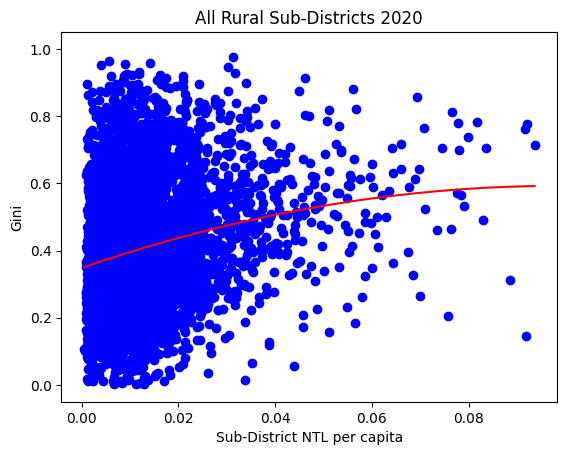

In [212]:

ale = final2011.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.1]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(-0.02,0.6)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

# 2020 Rework

In [213]:

## ma_ntl_data_updatedsums_Latest_Alldata is the main file
ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums_Latest_Alldata.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW ma_ntl_data_updatedsums_NEW_Alldata

# ma = pd.read_csv('/Users/sid/Desktop/ma_ntl_data_updatedsums_Latest_Alldata.csv',low_memory=False)

meg = ma.copy()
meg = meg.drop([
    # 'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
    #    'State code','Village',
       'other_assembly_constituencies',
       'subdist_ntl_pa','vilcode11_y'
       ], axis=1)

meg = meg.rename(columns={
                        'state_name': 'State', 
                        'district_name': 'District',
                        'gp_name':'GP',
                        'sub_district_name':'Subdistrict',
                        'village_name':'Village','block_name':'Block',
                        'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                        'block_code':'Block_code','gp_code':'GP_code',
                        'Village code':'Village_code',
                        'vilcode11_x':'vilcode11'
                                    })

meg = meg.dropna(subset=['avg_ntl'])
meg = meg.dropna(subset=['total_population'])
meg = meg[meg['total_population'] != 'Nava Mota']
meg['total_population'] = meg['total_population'].astype(float)
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# Reset the index if needed
meg.reset_index(drop=True, inplace=True)
meg['total_population'] = meg['total_population'].astype(float)


In [215]:
column_names = meg.columns.tolist()
column_names

['State_code',
 'State',
 'District_code',
 'District',
 'Subdistrict_code',
 'Subdistrict',
 'Block_code',
 'Block',
 'GP_code',
 'GP',
 'Village_code',
 'Village',
 'village_pin_code',
 'pc_code',
 'ac_code',
 'total_population',
 'male_population',
 'female_population',
 'total_hhd',
 'total_hhd_engaged_in_farm_activities',
 'total_hhd_engaged_in_non_farm_activities',
 'is_govt_seed_centre_available',
 'availability_of_fpos_pacs',
 'availability_of_food_storage_warehouse',
 'availability_of_farm_gate_processing',
 'total_cultivable_area_in_hac',
 'is_soil_testing_centre_available',
 'is_fertilizer_shop_available',
 'availability_of_major_source_of_irrigation',
 'availability_of_livestock_extension_services',
 'availability_of_milk_routes',
 'availability_of_poultry_dev_project',
 'availability_of_goatary_dev_project',
 'availability_of_pigery_development',
 'is_veterinary_hospital_available',
 'is_village_connected_to_all_weather_road',
 'availability_of_internal_pucca_road',
 'avai

In [216]:
meg_filtered = meg[[
    'State_code',
    'State',
    'District_code',
    'District',
    'Subdistrict_code',
    'Subdistrict',
    'Village_code',
    'Village',
    'GP_code',
    'GP',
    'total_hhd',
    'total_population',
    'male_population',
    'female_population',
    'total_hhd_engaged_in_farm_activities',
    'total_hhd_having_bpl_cards',
    'availability_of_primary_school',
    'availability_of_middle_school',
    'availability_of_high_school',
    'availability_of_ssc_school',
    'availability_of_govt_degree_college',
    'is_vocational_edu_centre_available',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_veterinary_hospital_available',
    'is_aanganwadi_centre_available',
    'is_bank_available',
    'is_post_office_available',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_village_connected_to_all_weather_road',
    'availability_of_market',
    'nearest_urban_proximity',
    'Village',
    'stcode11',
    'dtcode11',
    'sdtcode11',
    'vilcode11',
    'state',
    'district',
    'subdistrict',
    'vilname11',
    'vil_code',
    'dist_lgd',
    'state_lgd',
    'gpcode',
    'gp',
    'subdt_lgd',
    'Block',
    'block_lgd',
    'ac_no',
    'village_area_sqkm',
    'SubDistrict Area',
    'avg_ntl',
    'ntl_pa',
    'ntl_pc'
]]

In [218]:
meg_renamed = meg_filtered.rename(columns={
                                           'total_population':'population',
                                  'male_population':'male_pop','female_population':'female_pop',
                                  'total_hhd_engaged_in_farm_activities':'hh_in_farm','total_hhd_having_bpl_cards':'bpl_cards_hh',
                                  'availability_of_primary_school':'p_school','availability_of_middle_school':'m_school',
                                  'availability_of_high_school':'h_school','availability_of_ssc_school':'ssc_school',
                                  'availability_of_govt_degree_college':'arts_and_science_degree_college',
                                  'is_vocational_edu_centre_available':'iti',
                                  'availability_of_phc_chc':'phc',
                                  'availability_of_mother_child_health_facilities':'mcwc','availability_of_jan_aushadhi_kendra':'dispensary',
                                  'is_veterinary_hospital_available':'veterinary_hospital','is_post_office_available':'post_office',
                                  'availability_of_public_transport':'bus',
                                  'availability_of_railway_station':'railway',
                                  'is_village_connected_to_all_weather_road':'all_weather_road',
                                  'is_bank_available':'cooperative_bank',
                                  'availability_of_market':'mandis',
                                  'is_aanganwadi_centre_available':'aanganwadi',                                  
                                  'nearest_urban_proximity':'nearest_town_distance'
                                  })
meg_renamed

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Village_code,Village,Village,GP_code,GP,total_hhd,population,male_pop,female_pop,hh_in_farm,bpl_cards_hh,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,Village,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc
0,21,ODISHA,350,CUTTACK,2956,Mahanga,399515.0,Juipur,JUIPUR,116997,HALADIA,4.0,10.0,6.0,4.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.759997,Juipur,JUIPUR,21.0,381.0,2956,399515.0,ODISHA,Cuttack,Mahanga,Juipur,399515.0,350.0,21.0,116997.0,HALADIA,2956.0,MAHANGA,MAHANGA,3339.0,95.0,0.734618,232.347463,8.646666,11.770295,0.864667
1,21,ODISHA,350,CUTTACK,2956,Mahanga,399612.0,Jhadeswarpur,JHADESWARPUR,116997,HALADIA,829.0,3365.0,1714.0,1651.0,700.0,405.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0.593258,Jhadeswarpur,JHADESWARPUR,21.0,381.0,2956,399612.0,ODISHA,Cuttack,Mahanga,Jhadeswarpur,399612.0,350.0,21.0,116997.0,HALADIA,2956.0,MAHANGA,MAHANGA,3339.0,95.0,3.249447,232.347463,25.984444,7.996574,0.007722
2,21,ODISHA,373,SUNDARGARH,2826,Koida,384764.0,Kalmanga,KALAMANGA,121618,MALDA,98.0,250.0,158.0,92.0,0.0,15.0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,6.777968,Kalmanga,KALAMANGA,21.0,374.0,2826.0,384764.0,ODISHA,Sundargarh,Koida,Kalmanga,384764.0,373.0,21.0,121618.0,MALDA,2826.0,KOIDA,KOIDA,3579.0,14.0,9.149993,409.789450,142.695557,15.595155,0.570782
3,21,ODISHA,348,BHADRAK,2918,Dhusuri,395292.0,Palasahi,Palasahi,116743,PALASAHI,916.0,4950.0,2555.0,2395.0,695.0,322.0,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,5.676526,Palasahi,Palasahi,21.0,378.0,2918,395292.0,ODISHA,Bhadrak,Dhusuri,Palasahi,395292.0,348.0,21.0,116743.0,PALASAHI,2918.0,DHAMANAGAR,DHAMANAGAR,3327.0,46.0,2.444098,143.099406,19.591111,8.015683,0.003958
4,21,ODISHA,349,BOUDH,3128,Manamunda,418004.0,Kumarakani,KUMARKANI,275028,KHALIAPALI,104.0,498.0,231.0,267.0,1.0,1.0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1.035106,Kumarakani,KUMARKANI,21.0,391.0,3128,418004.0,ODISHA,Boudh,Manamunda,Kumarakani,418004.0,349.0,21.0,275028.0,KHALIAPALI,3128.0,BOUDH,BOUDH,3329.0,85.0,2.623406,622.361985,10.174444,3.878335,0.020431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539771,22,CHHATTISGARH,734,Gaurella Pendra Marwahi,3288,Marwahi,437548.0,Kumhari,KUMHARI,122889,KUMHARI,766.0,2796.0,1406.0,1390.0,740.0,766.0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,6.627656,Kumhari,KUMHARI,22.0,791.0,03288,437548.0,CHHATTISGARH,Gaurella Pendra Marwahi,Marwahi,Kumhari,437548.0,734.0,22.0,122889.0,KUMHARI,3288.0,MARWAHI,MARWAHI,3609.0,24.0,7.915236,847.104651,39.628889,5.006660,0.014173
539772,22,CHHATTISGARH,734,Gaurella Pendra Marwahi,3288,Marwahi,437584.0,Madai,MARAI,122893,MADAI,507.0,1688.0,798.0,846.0,278.0,487.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9.434859,Madai,MARAI,22.0,791.0,03288,437584.0,CHHATTISGARH,Gaurella Pendra Marwahi,Marwahi,Madai,437584.0,734.0,22.0,122893.0,MADAI,3288.0,MARWAHI,MARWAHI,3609.0,24.0,10.674884,847.104651,55.677778,5.215773,0.032984
539773,22,CHHATTISGARH,374,BASTAR,3363,Bastar,449336.0,Pallichakwa,PALLICHAKWA,121919,BODANPAL,250.0,450.0,250.0,200.0,150.0,120.0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,0,2.425191,Pallichakwa,PALLICHAKWA,22.0,414.0,03363,449336.0,CHHATTISGARH,Bastar,Bastar,Pallichakwa,449336.0,374.0,22.0,121919.0,BODANPAL,3363.0,BASTAR,BASTAR,3593.0,85.0,3.241391,1160.344223,14.326667,4.419913,0.031837
539774,22,CHHATTISGARH,389,SURGUJA,3253,Batouli,433505.0,Nakna,NAKNA,130602,NAKNA,450.0,2200.0,1280.0,920.0,445.0,362.0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN,Nakna,NAKNA,22.0,401.0,03253,433505.0,

In [219]:
meg_renamed=meg_renamed.drop_duplicates(subset='vil_code')
meg_sorted = meg_renamed.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
meg_sorted['Index'] = meg_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
meg_sorted['Max_Len'] = meg_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')

meg_sorted = meg_sorted[meg_sorted['population'] != 0]

meg_sorted

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Village_code,Village,Village,GP_code,GP,total_hhd,population,male_pop,female_pop,hh_in_farm,bpl_cards_hh,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,Village,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len
47446,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645222.0,Subhashgram (RV),SUBHASHGRAM,234477,SUBASHGRAM,1050.0,3348.0,1720.0,1628.0,410.0,232.0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,3.517003,Subhashgram (RV),SUBHASHGRAM,35.0,639.0,05919,645222.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Subhashgram (RV),645222.0,632.0,35.0,234477.0,SUBASHGRAM,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,3.818813,1534.907491,26.135556,6.843895,0.007806,1,30
47579,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645237.0,Kalighat (RV),KALIGHAT,234466,KALIGHAT,451.0,1636.0,837.0,799.0,91.0,12.0,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,1,1,16.843081,Kalighat (RV),KALIGHAT,35.0,639.0,05919,645237.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Kalighat (RV),645237.0,632.0,35.0,234466.0,KALIGHAT,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,4.637911,1534.907491,14.673333,3.163781,0.008969,2,30
47536,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645218.0,Madhupur (RV),MADHUPUR,234470,MADHUPUR,819.0,3097.0,1664.0,1433.0,731.0,209.0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1.609613,Madhupur (RV),MADHUPUR,35.0,639.0,05919,645218.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Madhupur (RV),645218.0,632.0,35.0,234470.0,MADHUPUR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,7.669943,1534.907491,29.957777,3.905867,0.009673,3,30
47516,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645220.0,Sitanagar (RV),SITAPUR,234476,SITANAGAR,660.0,2477.0,1271.0,1184.0,243.0,0.0,1,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,NaN,Sitanagar (RV),SITAPUR,35.0,639.0,05919,645220.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Sitanagar (RV),645220.0,632.0,35.0,234476.0,SITANAGAR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,10.426155,1534.907491,28.177778,2.702605,0.011376,4,30
47545,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645216.0,Laxmipur (RV),LAXMIPURI,234469,LAXMIPUR,371.0,1450.0,726.0,724.0,200.0,0.0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,2.937917,Laxmipur (RV),LAXMIPURI,35.0,639.0,05919,645216.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Laxmipur (RV),645216.0,632.0,35.0,234469.0,LAXMIPUR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,7.400439,1534.907491,20.591111,2.782417,0.014201,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,19,WEST BENGAL,321,PURULIA,2384,Santuri,330534.0,Khayerbasia Chak,Jorberya,111120,SANTURI,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.646521,Khayerbasia Chak,Jorberya,19.0,340.0,02384,330534.0,WEST BENGAL,Purulia,Santuri,Khayerbasia Chak,330534.0,321.0,19.0,111120.0,SANTURI,2384.0,SANTURI,SANTURI,3063.0,246.0,0.410174,216.977568,4.962222,12.097843,4.962222,96,100
61443,19,WEST BENGAL,321,PURULIA,2383,Neturia,330481.0,Purna Panchakot,Arajiraghabpur,111062,JANARDANDIH,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.285001,Purna Panchakot,Arajiraghabpur,19.0,340.0,02384,330481.0,WEST BENGAL,Purulia,Santuri,Purna Panchakot,330481.0,321.0,19.0,111062.0,JANARDANDIH,2384.0,NETURIA,SANTURI,3063.0,246.0,0.743693,216.977568,8.360000,11.241196,8.360000,97,100
62751,19,WEST BENGAL,321,PURULIA,2384,Santuri,330588

In [220]:
meg_codes = meg_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
meg_codes=meg_codes.drop_duplicates(subset=['state','district','subdistrict',])


In [221]:
meg_sub = meg_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum',
                                                                               'mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

meg_sub['subdist_ntl_pc']=meg_sub['avg_ntl']/meg_sub['population']
meg_sub

,state,district,subdistrict,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,subdist_ntl_pc
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35692.0,18564.0,17104.0,27,15,10,6,0,2,4,25,1,15,30,11,19,0,27,5,10,6.615819,211.546587,1534.907491,787.377774,167.883888,0.031353,0.022060
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,23019.0,11680.0,11339.0,19,6,7,4,1,0,3,17,0,10,23,8,13,0,21,4,10,9.168078,83.322747,818.131581,326.962222,124.832381,0.016296,0.014204
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,28938.0,14641.0,14273.0,31,20,11,8,0,1,5,26,1,11,37,13,29,0,34,7,11,17.883180,899.964131,1295.502730,1598.068923,163.210404,0.054991,0.055224
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,46213.0,23647.0,22565.0,31,15,9,8,0,2,6,32,1,12,40,14,38,0,38,10,17,5.210248,151.718945,1357.952352,820.467774,335.272985,0.023335,0.017754
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,23128.0,12138.0,10990.0,5,4,3,2,0,1,4,5,1,3,5,3,5,0,5,3,5,1.834232,728.126714,736.782070,1073.398881,18.433553,0.049661,0.046411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,102,48,34,29,7,19,13,83,3,35,99,56,73,14,89,21,7,6.076268,325.686282,338.330324,1947.184437,688.864212,0.034051,0.011674
5639,WEST BENGAL,Purulia,Purulia - II,194734.0,101166.0,93399.0,103,47,25,20,1,2,3,33,8,7,101,37,52,4,91,14,7,7.531072,366.596006,385.255824,3537.317640,1099.607996,0.700143,0.018165
5640,WEST BENGAL,Purulia,Raghunathpur - I,104148.0,54109.0,50021.0,68,15,11,8,1,3,1,35,1,1,73,9,18,6,49,5,2,5.396432,202.929418,230.787399,1708.232216,861.738852,0.241409,0.016402
5641,WEST BENGAL,Purulia,Raghunathpur - II,129086.0,67609.0,61467.0,80,19,10,9,1,3,3,46,6,1,84,15,19,2,77,4,3,4.238327,236.032043,238.179758,4209.538889,2493.836300,1.358233,0.032610


In [222]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale20 = meg_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale20.columns = ['state','district',
               'subdistrict',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

In [223]:
ale20

,state,district,subdistrict,sum_y,numerator,num,alesina
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,0.940580,9.675809,30.0,0.347529
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,0.374799,3.626790,23.0,0.202032
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,2.034664,11.719068,37.0,0.715692
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,0.956753,12.015709,41.0,0.411764
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,0.248306,0.313978,5.0,0.694206
...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,3.541322,59.974155,104.0,0.683932
5639,WEST BENGAL,Purulia,Purulia - II,78.416034,334.544747,112.0,0.932745
5640,WEST BENGAL,Purulia,Raghunathpur - I,19.312691,64.853091,80.0,0.928549
5641,WEST BENGAL,Purulia,Raghunathpur - II,141.256222,795.318352,104.0,0.901340


In [224]:
f2 = pd.merge(meg_sub, ale20, on=['state','district','subdistrict'],how='left')
final2020 = pd.merge(f2, meg_codes, on=['state','district','subdistrict'],how='inner')
final2020['year']=2020
final2020

,state,district,subdistrict,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,subdist_ntl_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35692.0,18564.0,17104.0,27,15,10,6,0,2,4,25,1,15,30,11,19,0,27,5,10,6.615819,211.546587,1534.907491,787.377774,167.883888,0.031353,0.022060,0.940580,9.675809,30.0,0.347529,35.0,639.0,05919,35.0,632.0,5919.0,2020
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,23019.0,11680.0,11339.0,19,6,7,4,1,0,3,17,0,10,23,8,13,0,21,4,10,9.168078,83.322747,818.131581,326.962222,124.832381,0.016296,0.014204,0.374799,3.626790,23.0,0.202032,35.0,639.0,05920,35.0,632.0,5920.0,2020
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,28938.0,14641.0,14273.0,31,20,11,8,0,1,5,26,1,11,37,13,29,0,34,7,11,17.883180,899.964131,1295.502730,1598.068923,163.210404,0.054991,0.055224,2.034664,11.719068,37.0,0.715692,35.0,639.0,05921,35.0,632.0,5921.0,2020
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,46213.0,23647.0,22565.0,31,15,9,8,0,2,6,32,1,12,40,14,38,0,38,10,17,5.210248,151.718945,1357.952352,820.467774,335.272985,0.023335,0.017754,0.956753,12.015709,41.0,0.411764,35.0,640.0,05922,35.0,602.0,5922.0,2020
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,23128.0,12138.0,10990.0,5,4,3,2,0,1,4,5,1,3,5,3,5,0,5,3,5,1.834232,728.126714,736.782070,1073.398881,18.433553,0.049661,0.046411,0.248306,0.313978,5.0,0.694206,35.0,640.0,05924,35.0,602.0,5924.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,102,48,34,29,7,19,13,83,3,35,99,56,73,14,89,21,7,6.076268,325.686282,338.330324,1947.184437,688.864212,0.034051,0.011674,3.541322,59.974155,104.0,0.683932,19.0,340.0,02387,19.0,321.0,2387.0,2020
5639,WEST BENGAL,Purulia,Purulia - II,194734.0,101166.0,93399.0,103,47,25,20,1,2,3,33,8,7,101,37,52,4,91,14,7,7.531072,366.596006,385.255824,3537.317640,1099.607996,0.700143,0.018165,78.416034,334.544747,112.0,0.932745,19.0,340.0,02379,19.0,321.0,2379.0,2020
5640,WEST BENGAL,Purulia,Raghunathpur - I,104148.0,54109.0,50021.0,68,15,11,8,1,3,1,35,1,1,73,9,18,6,49,5,2,5.396432,202.929418,230.787399,1708.232216,861.738852,0.241409,0.016402,19.312691,64.853091,80.0,0.928549,19.0,340.0,02382,19.0,321.0,2382.0,2020
5641,WEST BENGAL,Purulia,Raghunathpur - II,129086.0,67609.0,61467.0,80,19,10,9,1,3,3,46,6,1,84,15,19,2,77,4,3,4.238327,236.032043,238.179758,4209.538889,2493.836300,1.358233,0.032610,141.256222,795.318352,104.0,0.901340,19.0,340.0,02381,19.0,321.0,2381.0,2020


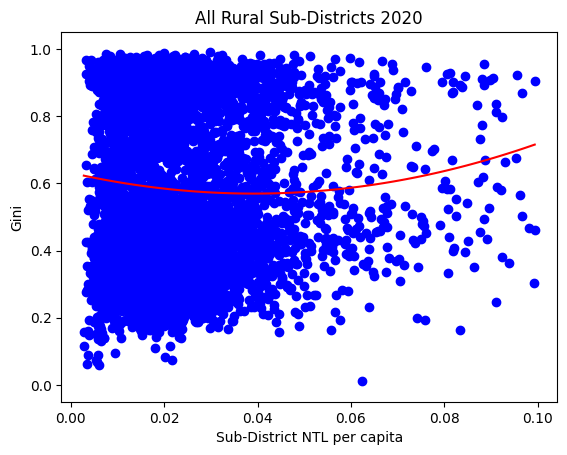

In [225]:

ale = final2020.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.1]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(-0.02,0.6)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

# 2017 Rework

## Recoding

In [230]:
ma2 = pd.read_csv('/Users/sid/Documents/MA_17/MA_2017.csv',low_memory=False)
ma2 = ma2[ma2['Total Population'] > 0]
ntl17 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/India_NTL_2018.csv') 

In [240]:
ma2.columns

Index(['State', 'State code', 'Sub District', 'Sub District code',
       'Gram Panchayat', 'Gram Panchayat code', 'PIN', 'District',
       'District code', 'Development Block', 'Development Block code',
       'Village', 'Village code', 'Total Population', 'Male', 'Female',
       'Total Household', 'Total number of SHGs promoted',
       'Total Area (in hectares)', 'Net sown Area(In hectares)',
       'Total Un irrigated land area (in hectare)',
       'Area irrigated (in hectare)',
       '% households engaged exclusively in Farm  activitie',
       '% households engaged exclusively in   Non-farm activities',
       'Availability of banks',
       'Availability of bank/Business correspondent  with internet connectivity',
       'Availability of ATM',
       'Whether the village is connected to All  weather road',
       'Whether village has an internal cc/ brick  road',
       'Availability of Public Transport',
       'Availability of Internet Café/Common  Service Center',
       

In [241]:
# Get unique values in the column
unique_cities = ma2['Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY'].unique()

unique_cities

array(['No', nan, 'Yes', 'No ( Nearest facility1-2 kms)', '0'],
      dtype=object)

In [235]:
def remove_extra_spaces(col):
  # Check if dtype is string, then apply string methods
  if pd.api.types.is_string_dtype(col):
    return col.str.strip().str.replace('\s+', ' ', regex=True)
  # Otherwise, return the column as-is (for integer columns)
  else:
    return col

# Apply the function to each column using apply
ma2 = ma2.apply(remove_extra_spaces)

In [237]:
# Initialize new columns with zeros
ma2['p_school'] = 0
ma2['m_school'] = 0
ma2['h_school'] = 0
ma2['ssc_school'] = 0

# Define a function to set the appropriate columns based on the value
def set_school_columns(row):
    if row['Availability of School'] == 'Primary School':
        row['p_school'] = 1
    elif row['Availability of School'] == 'Middle School':
        row['p_school'] = 1
        row['m_school'] = 1
    elif row['Availability of School'] == 'High School':
        row['p_school'] = 1
        row['m_school'] = 1
        row['h_school'] = 1
    elif row['Availability of School'] == 'Senior Secondary School':
        row['p_school'] = 1
        row['m_school'] = 1
        row['h_school'] = 1
        row['ssc_school'] = 1
    return row

# Apply the function to each row
ma3 = ma2.apply(set_school_columns, axis=1)

In [254]:
ma3 = ma3.fillna(0)
# Define a dictionary for mapping
replacements = {"Yes": 1, 
                "No ( Nearest facility< 1 Km)":1,
                "No ( Nearest facility1-2 kms)":1,
                "No ( Nearest facility2-5 kms)": 0,
                'No ( Nearest facility5-10 Kms)':0,
                "No ( Nearest facilityMore than 10 kms)": 0,
                "No ( Nearest facility10-20 kms)":0,
                "No ( Nearest facilityMore than 20 kms)":0,
                'No ( Nearest facility)':0,
                "No": 0 ,

                "Not covered":0,
                "Partially covered":1,
                "Fully covered":1,

                "_":0,

                "Bus":1,
                "Auto":0,
                "Van":0,
                "None ( Nearest facility< 1  Km)":1,
                "None ( Nearest facility1-2  kms)":1,
                "None ( Nearest facility2-5  kms)":0,
                "None ( Nearest facility5-10  Kms)":0,
                "None ( Nearest facilityMore  than 10 kms)":0,
                "None ( Nearest facilityMore than 10 kms)":0,
                "None ( Nearest facility)":0,

                "None ( Nearest facility< 1 Km)":1,
                "None ( Nearest facility1-2 kms)":1,
                "None ( Nearest facility2-5 kms)":0,
                "None ( Nearest facility5-10 Kms)":0,


                "Mandis":1,
                "Regular market":1,
                "Weekly Haat":1,

                "CHC":1,
                "PHC":1,
                "Sub Centre":1,

                'None':0,
                }

ma4 = ma3.replace(replacements)


In [248]:
print(ma4['Village code'].dtype)
print(ntl12['vil_code'].dtype)


object
int64


In [253]:
ma4['Village code'] = pd.to_numeric(ma4['Village code'], errors='coerce')
ntl12['Village code'] = pd.to_numeric(ntl12['vil_code'], errors='coerce')
# Drop rows with NaN values in 'Village code'
ma4 = ma4.dropna(subset=['Village code'])
ntl12 = ntl12.dropna(subset=['vil_code'])

ma4['Village code'] = ma4['Village code'].astype(int)
ntl12['vil_code'] = ntl12['vil_code'].astype(int)

fin3 = pd.merge(ma4, ntl17, left_on='Village code', right_on='vil_code', how='inner')
# fin3 = fin3.drop(['State code','State','District code',
#                     'District','Subdistrict','SubDistrict code','Block code','Block'
#                     ], axis=1)
fin3['ntl_pc']=fin3['avg_ntl']/fin3['Total Population']
fin3

,State,State code,Sub District,Sub District code,Gram Panchayat,Gram Panchayat code,PIN,District,District code,Development Block,Development Block code,Village_x,Village code,Total Population,Male,Female,Total Household,Total number of SHGs promoted,Total Area (in hectares),Net sown Area(In hectares),Total Un irrigated land area (in hectare),Area irrigated (in hectare),% households engaged exclusively in Farm activitie,% households engaged exclusively in Non-farm activities,Availability of banks,Availability of bank/Business correspondent with internet connectivity,Availability of ATM,Whether the village is connected to All weather road,Whether village has an internal cc/ brick road,Availability of Public Transport,Availability of Internet Café/Common Service Center,Availability of electricity for domestic use(in Hrs),Availability of Public Distribution System (PDS),Availability of markets,Availability of Piped tap water,Availability of Telephone Services,Total no of household using clean energy (LPG/Bio gas),No of household with kuccha wall and kuccha roof,Availability of Post office/Sub-Post office,Availability of School,Availability of Vocational Educational Centre/ITI/RSETI/DDU-GKY,Availability of Sub centre /PHC/CHC,Availability of Veterinary Clinic Hospital,Availability of drainage facilities,Availability of Soil Testing Centres,Availability of government Seed,Availability of Fertilizer Shop,Community waste disposal system,Community bio gas or recycle of waste for production use,Is the village Open Defacation Free,Availability Of Aanganwadi Centre,No of total children in the age group of 0-3 years,No of children aged 0-3 years registered under Aanganwadi,No of children aged 0-3 years immunized,No of children categorized as Non-Stunted as per ICDS record,No. of households mobilized into SHGs,No. of households mobilized into Producer Groups (PGs),No. of households supported by village based Agricultural Extension Workers,No. of households supported by village based Livestock Extension Workers,No. of SHGs accessed bank loans,Community bio gas or recycle of waste for production use,No of children categorized as Non- Stunted as per ICDS record,Availability of electricity for domestic use(in Hrs),Total no of household using clean energy (LPG/Bio gas),No. of households mobilized into Producer Groups (PGs),% households engaged exclusively in Non- farm activities,p_school,m_school,h_school,ssc_school,Village_y,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,ntl_pc
0,ODISHA,21,Kochinda,2782,DIMIRIMUNDA,121315.0,768107.0,SAMBALPUR,371,JAMANKIRA,3560,Bamandagarh,381624,542.0,274.0,268.0,130.0,8.0,246.000,125.850,125.850,0.000,80.0,20.0,0,0,0,0,0,0,0,8-12 Hrs,1,0,0,Mobile,0,103.0,1,Middle School,0,0,0,Open Kuccha Drainage,0,0,0,0,0,0,1,28.0,28.0,28.0,28,86.0,0,48.0,43.0,0.0,0,0.0,0,0,0,0,1,1,0,0,BAMANDAGARH,21,372,2782.0,381624.0,ODISHA,Sambalpur,Kochinda,Bamandagarh,381624,371,21,121315,DIMIRIMUNDA,2782,JAMANKIRA,3560,15.0,2.923691,629.505103,4.114239,10.215556,3.494061,0.018848
1,ODISHA,21,Chitrakonda,3223,PAPERMETLA,119990.0,764052.0,MALKANGIRI,364,KUDUMULUGUMMA,3483,Rampur,430662,86.0,56.0,30.0,38.0,0.0,80.020,80.020,40.020,15.000,2.0,0.0,0,0,0,0,0,0,0,4-8 Hrs,1,0,0,0,0,37.0,1,Primary School,0,0,0,0,0,0,0,1,0,1,0,6.0,4.0,3.0,0,0.0,0,0.0,0.0,0.0,1,2.0,0,0,0,0,1,0,0,0,RAMPUR,21,399,3223.0,430662.0,ODISHA,Malkangiri,Chitrakonda,Rampur,430662,364,21,119990,PAPERMETLA,3223,KORUKONDA,3482,147.0,0.797421,482.244181,3.480380,4.903334,6.148991,0.057016
2,ODISHA,21,Barkot,2801,JHARAKHANDHAL,117187.0,768110.0,DEOGARH,351,BARKOTE,3346,Gurujung,382825,390.0,198.0,192.0,125.0,9.0,247.000,52.000,221.000,26.000,95.0,5.0,0,1,0,1,1,0,1,0,1,1,<50% habitation covered,Mobile,0,96.0,0,Middle School,0,0,0,Open Pucca Drainage Uncovered,0,0,0,0,0,1,0,16.0,16.0,16.0,16,115.0,2,113.0,60.0,0.0,0,0.

## Analysis

In [262]:
column_names = fin3.columns.tolist()
column_names

['State',
 'State code',
 'Sub District',
 'Sub District code',
 'Gram Panchayat',
 'Gram Panchayat code',
 'PIN',
 'District',
 'District code',
 'Development Block',
 'Development Block code',
 'Village_x',
 'Village code',
 'Total Population',
 'Male',
 'Female',
 'Total Household',
 'Total number of SHGs promoted',
 'Total Area (in hectares)',
 'Net sown Area(In hectares)',
 'Total Un irrigated land area (in hectare)',
 'Area irrigated (in hectare)',
 '% households engaged exclusively in Farm  activitie',
 '% households engaged exclusively in   Non-farm activities',
 'Availability of banks',
 'Availability of bank/Business correspondent  with internet connectivity',
 'Availability of ATM',
 'Whether the village is connected to All  weather road',
 'Whether village has an internal cc/ brick  road',
 'Availability of Public Transport',
 'Availability of Internet Café/Common  Service Center',
 'Availability of electricity for domestic  use(in Hrs)',
 'Availability of Public Distributi

In [260]:
ma17=fin3.copy()
ma17 = ma17.dropna(subset=['avg_ntl'])
ma17 = ma17.dropna(subset=['Total Population'])


In [264]:
ma17_filtered = ma17[['State',
                    'State code',
                    'District',
                    'District code',
                    'Sub District',
                    'Sub District code',
                    'Village_x',
                    'Village code',
                    'Gram Panchayat',
                    'Gram Panchayat code',
                    'Total Household',
                    'Total Population',
                    'Male',
                    'Female',
                    '% households engaged exclusively in Farm  activitie',
                    'p_school',
                    'm_school',
                    'h_school',
                    'ssc_school',
                    'Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY',
                    'Availability of Sub centre /PHC/CHC',
                    'Availability Of Aanganwadi Centre',
                    'Availability of Veterinary Clinic Hospital',
                    'Availability of banks',
                    'Availability of Post office/Sub-Post office',
                    'Availability of markets',
                    'Availability of Public Transport',
                    'Whether the village is connected to All  weather road',
                    'Village_y',
                    'stcode11',
                    'dtcode11',
                    'sdtcode11',
                    'vilcode11',
                    'state',
                    'district',
                    'subdistrict',
                    'vilname11',
                    'vil_code',
                    'dist_lgd',
                    'state_lgd',
                    'gpcode',
                    'gp',
                    'subdt_lgd',
                    'Block',
                    'block_lgd',
                    'ac_no',
                    'village_area_sqkm',
                    'SubDistrict Area',
                    'subdist_ntl_pa',
                    'avg_ntl',
                    'ntl_pa',
                    'ntl_pc'
]]

In [268]:
ma17_renamed=  ma17_filtered.rename(columns={
                    'Total Household':'total_hhd','Total Population':'population',
                    'Male':'male_pop','Female':'female_pop',
                    '% households engaged exclusively in Farm  activitie':'hh_in_farm',
                    'Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY':'iti',
                    'Availability of Sub centre /PHC/CHC':'phc',
                    'Availability Of Aanganwadi Centre':'aanganwadi',
                    'Availability of Veterinary Clinic Hospital':'veterinary_hospital',
                    'Availability of banks':'cooperative_bank',
                    'Availability of Post office/Sub-Post office':'post_office',
                    'Availability of markets':'mandis',
                    'Availability of Public Transport':'bus',
                    'Whether the village is connected to All  weather road':'all_weather_road',
                    'Village_y':'Village',
})

ma17_renamed = ma17_renamed.drop([
       'Village_x',
       ], axis=1)

In [269]:
ma17_renamed=ma17_renamed.drop_duplicates(subset='vil_code')
ma17_sorted = ma17_renamed.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
ma17_sorted['Index'] = ma17_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
ma17_sorted['Max_Len'] = ma17_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')

ma17_sorted = ma17_sorted[ma17_sorted['population'] != 0]

ma17_sorted

,State,State code,District,District code,Sub District,Sub District code,Village code,Gram Panchayat,Gram Panchayat code,total_hhd,population,male_pop,female_pop,hh_in_farm,p_school,m_school,h_school,ssc_school,iti,phc,aanganwadi,veterinary_hospital,cooperative_bank,post_office,mandis,bus,all_weather_road,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len
23338,ANDAMAN AND NICOBAR ISLANDS,35,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,645222,SUBASHGRAM,234477.0,1048.0,3318.0,1708.0,1610.0,0.0,1,1,1,1,0,0,0,0,0,0,1,0,1,SUBHASHGRAM,35,639,05919,645222.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Subhashgram (RV),645222,632,35,234477,SUBASHGRAM,5919,DIGLIPUR,6492,NaN,3.818813,1534.907491,1.640385,28.312223,7.413880,0.008533,1,26
23276,ANDAMAN AND NICOBAR ISLANDS,35,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,645237,KALIGHAT,234466.0,434.0,1430.0,716.0,714.0,0.0,1,1,1,1,0,1,1,0,1,1,1,0,1,KALIGHAT,35,639,05919,645237.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Kalighat (RV),645237,632,35,234466,KALIGHAT,5919,DIGLIPUR,6492,NaN,4.637911,1534.907491,1.640385,15.294444,3.297701,0.010695,2,26
23360,ANDAMAN AND NICOBAR ISLANDS,35,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,645218,MADHUPUR,234470.0,796.0,2755.0,1428.0,1327.0,0.0,1,1,1,0,0,0,1,0,0,0,0,0,0,MADHUPUR,35,639,05919,645218.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Madhupur (RV),645218,632,35,234470,MADHUPUR,5919,DIGLIPUR,6492,NaN,7.669943,1534.907491,1.640385,30.581112,3.987137,0.011100,3,26
23241,ANDAMAN AND NICOBAR ISLANDS,35,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,645220,SITANAGAR,234476.0,686.0,2560.0,1321.0,1239.0,5.0,1,1,0,0,0,1,1,0,0,1,1,0,1,SITAPUR,35,639,05919,645220.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Sitanagar (RV),645220,632,35,234476,SITANAGAR,5919,DIGLIPUR,6492,NaN,10.426155,1534.907491,1.640385,28.605556,2.743634,0.011174,4,26
23367,ANDAMAN AND NICOBAR ISLANDS,35,NORTH AND MIDDLE ANDAMAN,632,Diglipur,5919,645227,KERALAPURAM,234467.0,184.0,571.0,286.0,285.0,0.0,1,0,0,0,0,1,1,0,0,1,1,0,1,AERIAL BAY,35,639,05919,645227.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Aerial Bay (RV),645227,632,35,234467,KERALAPURAM,5919,DIGLIPUR,6492,NaN,0.603391,1534.907491,1.640385,7.518889,12.461046,0.013168,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37420,WEST BENGAL,19,PURULIA,321,Neturia,2383,330482,JANARDANDIH,111062.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saramb,19,340,02384,330482.0,WEST BENGAL,Purulia,Santuri,Intapara,330482,321,19,111062,JANARDANDIH,2384,SANTURI,3063,246.0,0.229697,216.977568,10.083270,4.092222,17.815779,4.092222,98,102
33269,WEST BENGAL,19,PURULIA,321,Santuri,2384,330534,SANTURI,111120.0,1.0,1.0,1.0,0.0,100.0,0,0,0,0,0,0,1,0,0,0,0,0,0,Jorberya,19,340,02384,330534.0,WEST BENGAL,Purulia,Santuri,Khayerbasia Chak,330534,321,19,111120,SANTURI,2384,SANTURI,3063,246.0,0.410174,216.977568,10.083270,5.151111,12.558352,5.151111,99,102
35731,WEST BENGAL,19,PURULIA,321,Neturia,2383,330481,JANARDANDIH,111062.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arajiraghabpur,19,340,02384,330481.0,WEST BENGAL,Purulia,Santuri,Purna Panchakot,330481,321,19,111062,JANARDANDIH,2384,SANTURI,3063,246.0,0.743693,216.977568,10.083270,10.571111,14.214346,10.571111,100,102
33218,WEST BENGAL,19,PURULIA,321,Santuri,2384,330495,BALITORA,111116.0,1.0,2.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,Raigara,19,340,02384,330495.0,WEST BENGAL,Purulia,Santuri,Rakta,330495,321,19,111116,BALITORA,2384,SANTURI,3063,246.0,0.997875,216.977568,10.083270,39.071114,39.154333,19.535557,101,102


In [291]:
ma17_codes = ma17_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
ma17_codes=ma17_codes.drop_duplicates(subset=['state','district','subdistrict',])


columns_to_convert = ['iti', 'phc', 'veterinary_hospital', 'post_office']
ma17_sorted[columns_to_convert] = ma17_sorted[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [292]:
ma17_sub = ma17_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'iti':'sum',
                                                                               'phc':'sum',
                                                                               'veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

ma17_sub['subdist_ntl_pc']=ma17_sub['avg_ntl']/ma17_sub['population']
ma17_sub

,state,district,subdistrict,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,iti,phc,veterinary_hospital,aanganwadi,post_office,bus,all_weather_road,cooperative_bank,mandis,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,subdist_ntl_pc
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,32150.0,16634.0,15505.0,26,16,12,5,0,14,1,24,8,0,23,6,15,177.893531,1534.907491,639.966659,131.903906,0.025576,0.019906
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,19360.0,9944.0,9379.0,21,11,5,2,1,10,5,20,9,17,18,3,9,82.464111,818.131581,271.093325,87.270252,0.015366,0.014003
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,24876.0,12660.0,12164.0,26,18,12,6,0,15,5,31,7,2,27,13,14,886.713738,1295.502730,1478.380938,131.813530,0.062719,0.059430
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,43632.0,22549.0,21083.0,30,16,9,5,0,13,5,37,15,0,37,21,24,139.071630,1357.952352,725.397773,291.792242,0.025143,0.016625
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,30392.0,15718.0,14674.0,5,5,3,2,0,5,4,5,4,1,5,3,5,728.126714,736.782070,925.309968,16.976016,0.018643,0.030446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,WEST BENGAL,Purulia,Purulia - I,152062.0,78261.0,73801.0,100,36,25,12,6,39,9,103,30,40,64,17,28,331.102110,338.330324,2052.784433,743.966013,0.090495,0.013500
5329,WEST BENGAL,Purulia,Purulia - II,182569.0,93677.0,88338.0,101,28,20,9,2,29,4,112,23,37,83,30,50,374.084936,385.255824,3315.836616,1091.848972,0.756551,0.018162
5330,WEST BENGAL,Purulia,Raghunathpur - I,96629.0,49877.0,46752.0,70,22,16,5,1,18,1,81,12,20,47,13,9,205.966746,230.787399,1916.072234,1039.106327,0.585569,0.019829
5331,WEST BENGAL,Purulia,Raghunathpur - II,123799.0,65258.0,58540.0,73,19,10,4,0,19,4,92,14,31,76,16,16,236.032043,238.179758,4606.725865,2792.690628,1.443320,0.037211


In [293]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale17 = ma17_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale17.columns = ['state','district',
               'subdistrict',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

In [294]:
f3 = pd.merge(ma17_sub, ale17, on=['state','district','subdistrict'],how='left')
final2017 = pd.merge(f3, ma17_codes, on=['state','district','subdistrict'],how='inner')
final2017['year']=2017
final2017

,state,district,subdistrict,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,iti,phc,veterinary_hospital,aanganwadi,post_office,bus,all_weather_road,cooperative_bank,mandis,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,subdist_ntl_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,32150.0,16634.0,15505.0,26,16,12,5,0,14,1,24,8,0,23,6,15,177.893531,1534.907491,639.966659,131.903906,0.025576,0.019906,0.664982,6.528998,26.0,0.283207,35,639,05919,35,632,5919,2017
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,19360.0,9944.0,9379.0,21,11,5,2,1,10,5,20,9,17,18,3,9,82.464111,818.131581,271.093325,87.270252,0.015366,0.014003,0.338063,3.138068,22.0,0.201591,35,639,05920,35,632,5920,2017
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,24876.0,12660.0,12164.0,26,18,12,6,0,15,5,31,7,2,27,13,14,886.713738,1295.502730,1478.380938,131.813530,0.062719,0.059430,2.069741,9.526549,33.0,0.751347,35,639,05921,35,632,5921,2017
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,43632.0,22549.0,21083.0,30,16,9,5,0,13,5,37,15,0,37,21,24,139.071630,1357.952352,725.397773,291.792242,0.025143,0.016625,0.930289,10.146436,37.0,0.437473,35,640,05922,35,602,5922,2017
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,30392.0,15718.0,14674.0,5,5,3,2,0,5,4,5,4,1,5,3,5,728.126714,736.782070,925.309968,16.976016,0.018643,0.030446,0.093217,0.164299,5.0,0.494986,35,640,05924,35,602,5924,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,WEST BENGAL,Purulia,Purulia - I,152062.0,78261.0,73801.0,100,36,25,12,6,39,9,103,30,40,64,17,28,331.102110,338.330324,2052.784433,743.966013,0.090495,0.013500,9.773482,87.496025,108.0,0.843474,19,340,02387,19,321,2387,2017
5329,WEST BENGAL,Purulia,Purulia - II,182569.0,93677.0,88338.0,101,28,20,9,2,29,4,112,23,37,83,30,50,374.084936,385.255824,3315.836616,1091.848972,0.756551,0.018162,90.029602,495.285619,119.0,0.915943,19,340,02379,19,321,2379,2017
5330,WEST BENGAL,Purulia,Raghunathpur - I,96629.0,49877.0,46752.0,70,22,16,5,1,18,1,81,12,20,47,13,9,205.966746,230.787399,1916.072234,1039.106327,0.585569,0.019829,50.944479,241.585271,87.0,0.902480,19,340,02382,19,321,2382,2017
5331,WEST BENGAL,Purulia,Raghunathpur - II,123799.0,65258.0,58540.0,73,19,10,4,0,19,4,92,14,31,76,16,16,236.032043,238.179758,4606.725865,2792.690628,1.443320,0.037211,150.105277,873.428503,104.0,0.897716,19,340,02381,19,321,2381,2017


# Build Panel

In [295]:
mega = pd.concat([final2011,final2017,final2020])
mega

,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,subdist_ntl_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841.0,456.0,385.0,0.0,838.0,1,1,1,1,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1.0,1.0,1.0,1,1.0,1,1.0,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.211607,0.211607,0.211607,1.0,0.000000,35.0,638.0,05916,35.0,603.0,5916.0,2011
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20.0,15.0,5.0,0.0,20.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1.0,1.0,1.0,1,1.0,1,1.0,1,NaN,1.867272,1167.356958,0.655714,0.244827,0.351162,0.032786,0.032786,0.032786,0.065571,2.0,-0.500000,35.0,638.0,05918,35.0,603.0,5918.0,2011
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472.0,278.0,194.0,0.0,419.0,0,0,0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4,4.0,4,4.0,4,4.0,4.0,4.0,4,4.0,4,4.0,4,NaN,261.392905,518.303656,87.879997,0.353599,1.942922,1.347841,0.186186,5.391366,16.761146,6.0,0.130371,35.0,638.0,05917,35.0,603.0,5917.0,2011
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723.0,18643.0,17080.0,0.0,120.0,31,15,12,5,0.0,0.0,0,1.0,3.0,14.0,1.0,1.0,0.0,18.0,31,31.0,1,9.0,23,0.0,18.0,17.0,30,1.0,3,15.0,4,334.194444,1467.666522,1534.907491,649.064282,0.427400,69.529339,0.147162,0.018169,5.297823,13.710176,36.0,0.884006,35.0,639.0,05919,35.0,632.0,5919.0,2011
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383.0,10492.0,9891.0,0.0,139.0,20,11,5,2,1.0,0.0,1,0.0,2.0,9.0,0.0,1.0,4.0,18.0,21,21.0,4,8.0,18,0.0,12.0,4.0,4,2.0,2,15.0,9,222.600000,84.066677,818.131581,95.486024,0.320275,40.337002,0.022656,0.004685,0.566405,1.982869,25.0,0.759936,35.0,639.0,05920,35.0,632.0,5920.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,NaN,NaN,102,48,34,29,7.0,NaN,19,NaN,13.0,NaN,83.0,3.0,35.0,NaN,99,NaN,56,NaN,73,14.0,NaN,NaN,89,NaN,21,NaN,7,6.076268,325.686282,338.330324,1947.184437,NaN,688.864212,0.034051,0.011674,3.541322,59.974155,104.0,0.683932,19.0,340.0,02387,19.0,321.0,2387.0,2020
5639,WEST BENGAL,Purulia,Purulia - II,194734.0,101166.0,93399.0,NaN,NaN,103,47,25,20,1.0,NaN,2,NaN,3.0,NaN,33.0,8.0,7.0,NaN,101,NaN,37,NaN,52,4.0,NaN,NaN,91,NaN,14,NaN,7,7.531072,366.596006,385.255824,3537.317640,NaN,1099.607996,0.700143,0.018165,78.416034,334.544747,112.0,0.932745,19.0,340.0,02379,19.0,321.0,2379.0,2020
5640,WEST BENGAL,Purulia,Raghunathpur - I,104148.0,54109.0,50021.0,NaN,NaN,68,15,11,8,1.0,NaN,3,NaN,1.0,NaN,35.0,1.0,1.0,NaN,73,NaN,9,NaN,18,6.0,NaN,NaN,49,NaN,5,NaN,2,5.396432,202.929418,230.787399,1708.232216,NaN,861.738852,0.241409,0.016402,19.312691,64.853091,80.0,0.928549,19.0,340.0,02382,19.0,321.0,2382.0,2020
5641,WEST BENGAL,Purulia,Raghunathpur - II,129086.0,67609.0,61467.0,NaN,NaN,80,19,10,9,1.0,NaN,3,NaN,3.0,NaN,46.0,6.0,1.0,NaN,84,NaN,15,NaN,19,2.0,NaN,NaN,77,NaN,4,NaN,3,4.238327,236.032043,238.179758,4209.538889,NaN,2493.836300,1.358233,0.032610,141.256222,795.318352,104.0,0.901340,19.0,340.0,02381,19.0,321.0,2381.0,2020


In [296]:
mega['no_1000s'] = mega['population']/1000

mega['edu']= mega['p_school']+mega['m_school']+mega['h_school']+\
             mega['ssc_school']+mega['arts_and_science_degree_college']+mega['iti']
mega['edu_per_1000']= mega['edu']/mega['no_1000s']
mega['p_sch_per_1000']= mega['p_school']/mega['no_1000s']
mega['m_sch_per_1000']= mega['m_school']/mega['no_1000s']
mega['h_sch_per_1000']= mega['h_school']/mega['no_1000s']
mega['ssc_sch_per_1000']= mega['ssc_school']/mega['no_1000s']
mega['col_per_1000']= mega['arts_and_science_degree_college']/mega['no_1000s']
mega['iti_per_1000']= mega['iti']/mega['no_1000s']


mega['med'] = mega['phc']+mega['mcwc']+mega['dispensary']+\
              mega['veterinary_hospital']+mega['aanganwadi']
mega['med_per_1000'] = mega['med']+mega['no_1000s']
mega['phc_per_1000']= mega['phc']/mega['no_1000s']
mega['mcwc_per_1000']= mega['mcwc']/mega['no_1000s']
mega['dis_per_1000']= mega['dispensary']/mega['no_1000s']
mega['vet_per_1000']= mega['veterinary_hospital']/mega['no_1000s']
mega['aanganwadi_per_1000']= mega['aanganwadi']/mega['no_1000s']

mega['adm'] = mega['cooperative_bank']+mega['post_office']+mega['mandis']
mega['adm_per_1000'] = mega['adm']+mega['no_1000s']
mega['bank_per_1000']= mega['cooperative_bank']/mega['no_1000s']
mega['po_per_1000']= mega['post_office']/mega['no_1000s']
mega['mandi_per_1000']= mega['mandis']/mega['no_1000s']


mega['share_roads'] = mega['all_weather_road']/mega['num']
mega['share_rails'] = mega['railway']/mega['num']
mega['share_pubtn'] = mega['bus']/mega['num']

mega


,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,subdist_ntl_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year,no_1000s,edu,edu_per_1000,p_sch_per_1000,m_sch_per_1000,h_sch_per_1000,ssc_sch_per_1000,col_per_1000,iti_per_1000,med,med_per_1000,phc_per_1000,mcwc_per_1000,dis_per_1000,vet_per_1000,aanganwadi_per_1000,adm,adm_per_1000,bank_per_1000,po_per_1000,mandi_per_1000,share_roads,share_rails,share_pubtn
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841.0,456.0,385.0,0.0,838.0,1,1,1,1,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1.0,1.0,1.0,1,1.0,1,1.0,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.211607,0.211607,0.211607,1.0,0.000000,35.0,638.0,05916,35.0,603.0,5916.0,2011,0.841,4.0,4.756243,1.189061,1.189061,1.189061,1.189061,0.000000,0.000000,1.0,1.841,0.000000,0.000000,0.000000,0.000000,1.189061,3,3.841,1.189061,1.189061,1.189061,1.000000,1.000000,1.000000
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20.0,15.0,5.0,0.0,20.0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1.0,1.0,1.0,1,1.0,1,1.0,1,NaN,1.867272,1167.356958,0.655714,0.244827,0.351162,0.032786,0.032786,0.032786,0.065571,2.0,-0.500000,35.0,638.0,05918,35.0,603.0,5918.0,2011,0.020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.020,0.000000,0.000000,0.000000,0.000000,50.000000,3,3.020,50.000000,50.000000,50.000000,0.500000,0.500000,0.500000
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472.0,278.0,194.0,0.0,419.0,0,0,0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4,4.0,4,4.0,4,4.0,4.0,4.0,4,4.0,4,4.0,4,NaN,261.392905,518.303656,87.879997,0.353599,1.942922,1.347841,0.186186,5.391366,16.761146,6.0,0.130371,35.0,638.0,05917,35.0,603.0,5917.0,2011,0.472,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,4.472,0.000000,0.000000,0.000000,0.000000,8.474576,12,12.472,8.474576,8.474576,8.474576,0.666667,0.666667,0.666667
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723.0,18643.0,17080.0,0.0,120.0,31,15,12,5,0.0,0.0,0,1.0,3.0,14.0,1.0,1.0,0.0,18.0,31,31.0,1,9.0,23,0.0,18.0,17.0,30,1.0,3,15.0,4,334.194444,1467.666522,1534.907491,649.064282,0.427400,69.529339,0.147162,0.018169,5.297823,13.710176,36.0,0.884006,35.0,639.0,05919,35.0,632.0,5919.0,2011,35.723,63.0,1.763570,0.867788,0.419898,0.335918,0.139966,0.000000,0.000000,36.0,71.723,0.083980,0.027993,0.027993,0.000000,0.867788,8,43.723,0.083980,0.027993,0.111973,0.833333,0.000000,0.638889
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383.0,10492.0,9891.0,0.0,139.0,20,11,5,2,1.0,0.0,1,0.0,2.0,9.0,0.0,1.0,4.0,18.0,21,21.0,4,8.0,18,0.0,12.0,4.0,4,2.0,2,15.0,9,222.600000,84.066677,818.131581,95.486024,0.320275,40.337002,0.022656,0.004685,0.566405,1.982869,25.0,0.759936,35.0,639.0,05920,35.0,632.0,5920.0,2011,20.383,40.0,1.962420,0.981210,0.539665,0.245302,0.098121,0.049060,0.049060,28.0,48.383,0.098121,0.000000,0.049060,0.196242,1.030270,15,35.383,0.098121,0.196242,0.441544,0.160000,0.000000,0.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,NaN,NaN,102,48,34,29,7.0,NaN,19,NaN,13.0,NaN,83.0,3.0,35.0,NaN,99,NaN,56,NaN,73,14.0,NaN,NaN,89,NaN,21,NaN,7,6.076268,325.686282,338.330324,1947.184437,NaN,688.864212,0.034051,0.011674,3.541322,59.974155,104.0,0.683932,19.0,340.0,02387,19.0,321.

In [297]:
# mega.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel.csv',index=False)

# Village Matching Test

In [ ]:
meg20 = pd.merge(meg_sorted,ale20, on=['state','district','subdistrict'],how='left')
meg20['year']=2020
lum11 = pd.merge(lum12_sorted,ale2, on=['state','district','subdistrict'],how='left')
lum11['year']=2011

In [ ]:

# Handle duplicate column names by keeping the first occurrence
meg20 = meg20.loc[:, ~meg20.columns.duplicated()]

# Check for unique column names
if not meg20.columns.is_unique or not lum11.columns.is_unique:
    raise ValueError("One of the DataFrames has non-unique column names.")

# Find the common columns
common_columns = meg20.columns.intersection(lum11.columns)

# Subset both DataFrames to include only these common columns
meg20_common = meg20[common_columns]
lum11_common = lum11[common_columns]

# Concatenate the DataFrames
sync = pd.concat([meg20_common, lum11_common])
# sync

In [ ]:
# Group by the specified columns
# grouped = sync.groupby(['state', 'district', 'subdistrict', 'vil_code', 'Village'])
grouped = sync.groupby(['vil_code'])

# Filter groups that contain both years 2011 and 2020
filtered_sync = grouped.filter(lambda x: set(x['year']) >= {2011, 2020})

# Sort the resulting DataFrame
sorted_sync = filtered_sync.sort_values(by=['state', 'district', 'subdistrict', 'vil_code', 'Village', 'year'])
# sorted_sync

In [ ]:
dissorted_sync = sorted_sync.groupby(['state','district','subdistrict','year']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean',
                                                                               'Max_Len':'mean','sum_y':'mean',	'numerator':'mean',	'num':'mean','alesina':'mean',
                                                                               }).reset_index()

dissorted_sync['subdist_ntl_pc']=dissorted_sync['avg_ntl']/dissorted_sync['population']


In [ ]:
dissorted_sync['no_1000s'] = dissorted_sync['population']/1000

dissorted_sync['edu']= dissorted_sync['p_school']+dissorted_sync['m_school']+dissorted_sync['h_school']+\
             dissorted_sync['ssc_school']+dissorted_sync['arts_and_science_degree_college']+dissorted_sync['iti']
dissorted_sync['edu_per_1000']= dissorted_sync['edu']/dissorted_sync['no_1000s']
dissorted_sync['p_sch_per_1000']= dissorted_sync['p_school']/dissorted_sync['no_1000s']
dissorted_sync['m_sch_per_1000']= dissorted_sync['m_school']/dissorted_sync['no_1000s']
dissorted_sync['h_sch_per_1000']= dissorted_sync['h_school']/dissorted_sync['no_1000s']
dissorted_sync['ssc_sch_per_1000']= dissorted_sync['ssc_school']/dissorted_sync['no_1000s']
dissorted_sync['col_per_1000']= dissorted_sync['arts_and_science_degree_college']/dissorted_sync['no_1000s']
dissorted_sync['iti_per_1000']= dissorted_sync['iti']/dissorted_sync['no_1000s']


dissorted_sync['med'] = dissorted_sync['phc']+dissorted_sync['mcwc']+dissorted_sync['dispensary']+\
              dissorted_sync['veterinary_hospital']+dissorted_sync['aanganwadi']
dissorted_sync['med_per_1000'] = dissorted_sync['med']/dissorted_sync['no_1000s']
dissorted_sync['phc_per_1000']= dissorted_sync['phc']/dissorted_sync['no_1000s']
dissorted_sync['mcwc_per_1000']= dissorted_sync['mcwc']/dissorted_sync['no_1000s']
dissorted_sync['dis_per_1000']= dissorted_sync['dispensary']/dissorted_sync['no_1000s']
dissorted_sync['vet_per_1000']= dissorted_sync['veterinary_hospital']/dissorted_sync['no_1000s']
dissorted_sync['aanganwadi_per_1000']= dissorted_sync['aanganwadi']/dissorted_sync['no_1000s']

dissorted_sync['adm'] = dissorted_sync['cooperative_bank']+dissorted_sync['post_office']+dissorted_sync['mandis']
dissorted_sync['adm_per_1000'] = dissorted_sync['adm']/dissorted_sync['no_1000s']
dissorted_sync['bank_per_1000']= dissorted_sync['cooperative_bank']/dissorted_sync['no_1000s']
dissorted_sync['po_per_1000']= dissorted_sync['post_office']/dissorted_sync['no_1000s']
dissorted_sync['mandi_per_1000']= dissorted_sync['mandis']/dissorted_sync['no_1000s']


dissorted_sync['share_roads'] = dissorted_sync['all_weather_road']/dissorted_sync['num']
dissorted_sync['share_rails'] = dissorted_sync['railway']/dissorted_sync['num']
dissorted_sync['share_pubtn'] = dissorted_sync['bus']/dissorted_sync['num']

dissorted_sync['unique_id'] = dissorted_sync['state'] + '_' + dissorted_sync['district'] + '_' + dissorted_sync['subdistrict']
dissorted_sync['nearest_town_distance'] = dissorted_sync.groupby(['state', 'district', 'subdistrict'])['nearest_town_distance'].transform(lambda x: x.fillna(x.mean()))



In [ ]:
dis_sync = dissorted_sync.copy()

# List of variables to calculate differences for
variables = ['population', 'male_pop', 'female_pop', 'p_school', 'm_school', 'h_school',
             'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
             'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
             'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
             'village_area_sqkm', 'SubDistrict Area', 'avg_ntl', 'ntl_pa', 'ntl_pc',
             'Max_Len', 'sum_y', 'numerator', 'num', 'alesina', 'no_1000s', 'edu',
             'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000',
             'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000', 'med', 'med_per_1000',
             'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 'aanganwadi_per_1000',
             'adm', 'adm_per_1000', 'bank_per_1000', 'po_per_1000', 'mandi_per_1000',
             'share_roads', 'share_rails', 'share_pubtn']

# Calculate differences for each variable
for var in variables:
    # Pivot the data to wide format to easily calculate differences
    pivot_df = dis_sync.pivot(index=['state', 'district', 'subdistrict'], columns='year', values=var).reset_index()
    pivot_df.columns = [str(col) if not isinstance(col, str) else col for col in pivot_df.columns]
    pivot_df[f'{var}_change'] = pivot_df['2020'] - pivot_df['2011']
    pivot_df = pivot_df.drop(columns=['2011', '2020'])
    
    # Merge back to the original DataFrame
    dis_sync = pd.merge(dis_sync, pivot_df, on=['state', 'district', 'subdistrict'])

dis_sync=dis_sync.drop_duplicates(subset=['state','district','subdistrict',])

dis_sync = dis_sync.drop(columns=variables)
dis_sync = dis_sync.drop(columns={'year','no_1000s_change','village_area_sqkm_change','SubDistrict Area_change'},axis=1)
# dis_sync

In [ ]:
# dis_sync.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Raw_change.csv',index=False)

In [ ]:
summary_stats = sorted_sync.groupby(['state', 'year']).describe()

# Optionally, you can reset the index to make the DataFrame more readable
summary_stats = summary_stats.reset_index()
columns_to_drop = summary_stats.columns[summary_stats.columns.get_level_values(1).isin(['std', 'min', '25%', '50%', '75%', 'max'])]
summary_stats = summary_stats.drop(columns=columns_to_drop)
